<a href="https://colab.research.google.com/github/justdepie/MSc-Thesis-From-Tables-to-Natural-Language-Summaries/blob/main/QTSumm_All_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HF Login

In [4]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


#Data

##Load the data

https://arxiv.org/pdf/2305.14303.pdf

https://huggingface.co/datasets/yale-nlp/QTSumm?library=true

In [ ]:
%%capture
!pip install datasets

In [ ]:
from datasets import load_dataset

test = load_dataset("yale-nlp/QTSumm",split='test')
train = load_dataset("yale-nlp/QTSumm",split='train')
validation = load_dataset("yale-nlp/QTSumm",split='validation')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
print("Number of rows per set: \nTrain:",train.num_rows,"\nValidation:",validation.num_rows,"\nTest:",test.num_rows)

Number of rows per set: 
Train: 4981 
Validation: 1052 
Test: 1078


In [ ]:
train_df = train.to_pandas()
test_df = test.to_pandas()
val_df = validation.to_pandas()

In [ ]:
train_df.head()

,example_id,row_ids,summary,table,query
0,a560358f-7a28-4652-8cb7-43e1e6273849,"[0, 1, 2]",The Dragon Zakura TV series aired multiple epi...,"{'header': ['Unnamed: 0', 'Episode Title', 'Ro...",Summarize the basic information of the episode...
1,6dc04cdb-23ae-4ecf-b78d-81ee134d33a0,"[0, 1, 2, 3, 4, 5, 6, 7]",the range of attendances seen at events at The...,"{'header': ['No.', 'Event', 'Date', 'Venue', '...",What was the range of attendances seen at even...
2,e509992b-be6c-46f9-8cf7-6eb0c7ca7f2e,"[0, 1, 2, 3, 4]",In 2018 Chevrolet Silverado 250 qualifying res...,"{'header': ['Pos', 'No.', 'Driver', 'Team', 'M...",Which drivers and their corresponding teams ac...
3,1d5df1b4-2a2a-4caa-ad26-0f4b7cc6f0b6,[6],"Yes, an athlete from the United States partici...","{'header': ['Rank', 'Lane', 'Name', 'Nationali...",Did any athlete from the United States partici...
4,dd6b9bdb-96b1-44ef-b32b-470ee33ec425,"[6, 7]",The player play least balls in one match is Br...,"{'header': ['No.', 'Score', 'Player', 'Team', ...",Who played the minimum and maximum number of b...


####Filtering

In [ ]:
filtered_train_df = train_df[train_df['query'].str.startswith('Summarize')]
filtered_train_df.reset_index(inplace=True, drop=True)


In [ ]:
filtered_train_df

,example_id,row_ids,summary,table,query
0,a560358f-7a28-4652-8cb7-43e1e6273849,"[0, 1, 2]",The Dragon Zakura TV series aired multiple epi...,"{'header': ['Unnamed: 0', 'Episode Title', 'Ro...",Summarize the basic information of the episode...
1,d6ccd896-0b78-4401-9c6f-9406c47cc9d4,"[1, 2, 3]",The top three clubs in terms of points are Gil...,"{'header': ['Club', 'Played', 'Drawn', 'Lost',...",Summarize the basic information of the top thr...
2,31167ae8-3ae3-4c1d-a7a1-34ad5580c8c9,[3],The season with the highest household/viewers ...,"{'header': ['Season', 'Season Premiere', 'Seas...",Summarize the basic information of the season ...
3,65000fd8-f54b-43d1-a722-3222fa23398b,"[0, 5]","In Saint Petersburg, there are two football cl...","{'header': ['Club', 'League', 'Sport', 'Venue'...",Summarize the basic information of the footbal...
4,2e61dee5-5350-49ac-8d9c-37b9200c397e,"[4, 5]",The 2008 All-Ireland Senior Football Champions...,"{'header': ['Player', 'County', 'Tally', 'Tota...",Summarize the players from Wexford who partici...
...,...,...,...,...,...
879,6904a138-02ea-4de2-a436-14fbbf98cca2,[8],The season from 1998-99 had the highest number...,"{'header': ['Season', 'Tropical Lows', 'Tropic...",Summarize the season(s) which had the highest ...
880,9889f923-aaa7-4d88-a3bc-81b8e7637ae6,"[1, 2, 11]","In the 1964 season, the Toronto Argonauts and ...","{'header': ['Week', 'Date', 'Opponent', 'Locat...",Summarize the games between the Toronto Argona...
881,fbe30e16-a228-4a55-8841-715c762a4241,[0],The magazines published in English with a clas...,"{'header': ['Title', 'Language', 'Country', 'Y...",Summarize the magazines that are published in ...
882,bc25771c-7d27-473a-8dd2-2efb06074f84,"[0, 1, 8]",The cities in the Eurozone with the highest GD...,"{'header': ['Rank', 'City', 'State', 'Gdp In I...",Summarize the basic information of the cities ...


In [ ]:
filtered_validation_df = val_df[val_df['query'].str.startswith('Summarize')]
filtered_validation_df.reset_index(inplace=True, drop=True)

In [ ]:
filtered_validation_df

,example_id,row_ids,summary,table,query
0,c3ed8fbf-b5ae-4f9a-8eed-e91efbfe5ce9,[9],The Texas Longhorns Women's Basketball team ha...,"{'header': ['Texas Vs', 'Overall Record', 'Aus...",Summarize the record of Texas Longhorns Women'...
1,81a2320a-7232-458f-abf5-6479d103f3ac,"[2, 3]",Manchester City F.C. signed two players from U...,"{'header': ['Date', 'Pos', 'Player', 'From Clu...",Summarize the basic information of all the pla...
2,81d85a2a-2c91-42d4-8772-b1d95023da41,[5],The game between the 1966 Miami Hurricanes Foo...,"{'header': ['Game', 'Date', 'Opponent', 'Resul...",Summarize the game(s) between the 1966 Miami H...
3,d0a8db11-f207-4f35-a9a8-7999fef3143d,[8],The players who had over 100 league appearance...,"{'header': ['Rank', 'Name', 'Years', 'League',...",Summarize the basic information of the players...
4,8017441f-00c2-46fa-96eb-5f3f24d71dd6,[12],The Godson-T (Manycore) model is a processor w...,"{'header': ['Name / Generation', 'Model', 'Fre...",Summarize the basic information of the Godson ...
...,...,...,...,...,...
169,6956b492-95f8-4c9e-942a-739ed1d0d6d7,"[2, 3, 4]",The Yugoslavia National Football Team had thre...,"{'header': ['Date', 'City', 'Opponent', 'Resul...",Summarize the results of all the games played ...
170,11c5f645-3097-4630-9ae8-2539d219604d,"[4, 8]","In November 2007, the New York Rangers had two...","{'header': ['Game', 'November', 'Opponent', 'S...",Summarize the game(s) between the New York Ran...
171,bccfaaa2-33a9-4c50-8001-c42828b0c8e8,"[0, 1, 2]","The 2009-10 Bundesliga saw Sc 1880 Frankfurt, ...","{'header': ['Unnamed: 0', 'Club', 'Played', 'W...",Summarize the clubs which have won more than 9...
172,323f5b5b-61f2-4d75-91a1-e5f736076032,[5],Charles Pic's performance in the 2009 - 10 GP2...,"{'header': ['Season', 'Series', 'Team', 'Races...",Summarize Charles Pic's performance in the 200...


In [ ]:
filtered_test_df = test_df[test_df['query'].str.startswith('Summarize')]
filtered_test_df.reset_index(inplace=True, drop=True)

In [ ]:
filtered_test_df

,example_id,row_ids,summary,table,query
0,dd6370d7-c4cf-42f7-ac26-9731602f15bd,[0],The Army Cadets played Stevens Tech in the fir...,"{'header': ['Game', 'Date', 'Opponent', 'Resul...",Summarize the result of the game between Army ...
1,43e259ba-8c7f-41ef-83ba-b61205a2e3b0,"[1, 3]",Aurillac has served as the finish line for 2 P...,"{'header': ['Year', 'Stage', 'Category', 'Star...",Summarize the stages that had their finish lin...
2,3ab6f87a-524d-4929-a7d6-9a11caa53f2c,"[1, 2, 3, 4, 7]","Between 2005 and 2011, Japan hosted five FIFA ...","{'header': ['Season', 'Host', 'Winners', 'Scor...",Summarize the FIFA Club World Cup held in Japa...
3,a3eacf55-4bd5-4eb6-a3d7-7b767db83c9f,"[0, 3, 4]",The PGA Championship in the 1990s was won by 3...,"{'header': ['Player', 'Country', 'Year Won', '...",Summarize the golfers that won the PGA Champio...
4,8c081cab-0aeb-48b0-a614-39746c3f07b6,"[0, 1]",Christianity had the highest number of births ...,"{'header': ['Religion', 'Births', 'Conversions...",Summarize the basic information of the religio...
...,...,...,...,...,...
207,e3ed62d2-22a3-4bc4-be99-3eaa7b602d0a,[11],The religion with the highest growth rate acco...,"{'header': ['Religion', 'Births', 'Conversions...",Summarize the basic information of the religio...
208,94fc1b9a-a8d7-4724-be8d-df83f3753247,"[8, 9]","The October 5th, 2012 episode, ""A Kid Walks In...","{'header': ['Series No', 'Season No', 'Title',...",Summarize the basic information of the episode...
209,ebe8ba89-c114-4eef-ac15-137b3f5070a0,"[0, 1, 2]","At the 2008 Summer Olympics, the top three ath...","{'header': ['Rank', 'Athlete', 'Country', 'Tim...",Summarize the athletes who were in the top thr...
210,9099bffe-2a43-473d-a139-8131a9c10a96,"[0, 1]",The 2008 - 09 Connecticut Huskies Women's Bask...,"{'header': ['Player', 'Games Played', 'Minutes...",Summarize the players who have played in the 2...


##Train Set Preprocessing

In [ ]:
import pandas as pd
#convert all tables of train set to dataframes
train_tables=dict()

for i in range(len(train_df)):
  header = train_df.table.iloc[i]['header']
  rows = [row for row in train_df.table.iloc[i]['rows']]

  train_tables[i]= pd.DataFrame(rows, columns=list(header))

In [ ]:
train_tables[194]

,Rank,Name,Height m / feet,Floors,Year,Notes
0,1,Kempinski Hotel,228 / 695,53,2009,
1,2,Guizhou International Merchandise,160 / 524,42,2005,
2,2,Sheraton Hotel Guiyang,158 / 518,38,2005,
3,3,Quanlin International Plaza,151 / 495,40,2002,
4,4,Century Jinyuan Hotel,150 / 493,39,2009,
5,5,Times Mingshi Tower,140 / 459,35,2000,
6,6,Guiyang Central Park,124 / 406,40,2009,
7,7,Jinhao Mansion,121 / 396,38,2006,
8,8,Lanbowan West Tower,110 / 360,32,,
9,9,Lanbowan East Tower,110 / 360,32,,


In [ ]:
#convert all train set tables to text
table_to_text_train=list()
for table in train_tables.keys():
  table_to_text=list()
  for row in range(len(train_tables[table])):
    #if any(train_tables[table][column].iloc[row] for column in train_tables[table].columns):
      text_strings = [f"{column} is {train_tables[table][column].iloc[row]}" for column in train_tables[table].columns]
      result_text = ', '.join(text_strings)
      table_to_text.append(result_text)
  table_to_text_train.append(table_to_text)

table_to_text_train_one_str=list()
for lista in table_to_text_train:
  table_to_text_train_one_str.append(', '.join(lista))


In [ ]:
#get the index of highlighted rows
hr_train=dict()
for i in range(len(train_df)):
  hr_train[i]=list(train_df.row_ids.iloc[i])

In [ ]:
#get the values of highlighted rows
hinfo_train = dict()

for key in train_tables.keys():
  store=[]
  for index in hr_train[key]:
      if index <= len(train_tables[key]):
          info = list(train_tables[key].iloc[index].values)
          store.append(', '.join(info))

  hinfo_train[key] = ', '.join(store)

In [ ]:
shape_train=dict()
for key, table in train_tables.items():
  shape_train[key] = table.shape

In [ ]:
template_train=list()
for i in range(len(table_to_text_train_one_str)):
  addition = train_df['query'].iloc[i].replace(".", ": ")
  addition = addition + "Table converted to text: "+ table_to_text_train_one_str[i]
  addition = addition + ", Focus on: " + hinfo_train[i]
  addition = addition + f", Table Structure: Number of rows: {shape_train[i][0]}, Number of columns: {shape_train[i][1]} "
  template_train.append(addition)

In [ ]:
template_train[123]

"Among all the players listed, who played the most matches and in what time span was this achieved?Table converted to text: Cap (CricInfo) is 1, Cap (Southern Stars) is 10, Name is Peggy Antonio, Debut match is v England women's cricket team 28 December 1934, Latest match is v England women's cricket team 10 July 1937, Matches played is 6, Cap (CricInfo) is 2, Cap (Southern Stars) is 11, Name is Fernie Blade, Debut match is v England women's cricket team 28 December 1934, Latest match is –, Matches played is 1, Cap (CricInfo) is 3, Cap (Southern Stars) is 7, Name is Hilda Hills, Debut match is v England women's cricket team 28 December 1934, Latest match is –, Matches played is 1, Cap (CricInfo) is 4, Cap (Southern Stars) is 8, Name is Lorna Kettels, Debut match is v England women's cricket team 28 December 1934, Latest match is v England women's cricket team 18 January 1935, Matches played is 2, Cap (CricInfo) is 5, Cap (Southern Stars) is 4, Name is Nell McLarty, Debut match is v Eng

In [ ]:
input_train=pd.DataFrame(template_train,columns=['table to text'])
input_train['summary']=train_df['summary']
input_train

,table to text,summary
0,Summarize the basic information of the episode...,The Dragon Zakura TV series aired multiple epi...
1,What was the range of attendances seen at even...,the range of attendances seen at events at The...
2,Which drivers and their corresponding teams ac...,In 2018 Chevrolet Silverado 250 qualifying res...
3,Did any athlete from the United States partici...,"Yes, an athlete from the United States partici..."
4,Who played the minimum and maximum number of b...,The player play least balls in one match is Br...
...,...,...
4976,How many stations owned by Grupo Cadena in Tij...,Grup Chain own two station in Tijuana that bro...
4977,How many drivers have entered more than 300 ra...,Two drivers have entered more than 300 races: ...
4978,Which is the best-selling album in Indonesia a...,"The best-selling album in Indonesia is ""Sandiw..."
4979,Summarize the BMW X1 models released between 2...,"Between 2011 and 2012, BMW released several mo..."


##Validation set preprocessing

In [ ]:
import pandas as pd
#convert all tables of validation set to dataframes
validation_tables=dict()

for i in range(len(val_df)):
  header = val_df.table.iloc[i]['header']
  rows = [row for row in val_df.table.iloc[i]['rows']]

  validation_tables[i]= pd.DataFrame(rows, columns=list(header))

In [ ]:
validation_tables[0]

,Texas Vs,Overall Record,Austin,Opponent 'S Venue,Neutral Site,Last 5 Meetings,Last 10 Meetings,Current Streak
0,Baylor,"Ut , 57 - 23","Ut , 27 - 5","Ut , 22 - 13","Ut , 7 - 2","Bu , 3 - 2","Tied , 5 - 5",L 2
1,Colorado,"Ut , 14 - 4","Ut , 6 - 1","Ut , 6 - 2","Ut , 2 - 1","Ut , 4 - 1","Ut , 8 - 2",W 1
2,Iowa State,"Isu , 10 - 9","Ut , 6 - 2","Isu , 5 - 2","Isu , 3 - 1","Isu , 3 - 2","Tied , 5 - 5",L 2
3,Kansas,"Ut , 11 - 7","Ut , 4 - 3","Tied , 4 - 4","Ut , 3 - 0","Ut , 3 - 2","Ut , 7 - 3",W 1
4,Kansas State,"Ut , 10 - 8","Ut , 6 - 2","Ksu , 4 - 3","Ksu , 2 - 1","Ut , 3 - 2","Ksu , 6 - 4",L 1
5,Missouri,"Ut , 15 - 1","Ut , 9 - 0","Ut , 5 - 1","Ut , 1 - 0","Ut , 5 - 0","Ut , 9 - 1",W 8
6,Nebraska,"Ut , 12 - 5","Ut , 6 - 1","Ut , 4 - 3","Ut , 2 - 1","Ut , 3 - 2","Ut , 8 - 2",L 2
7,Oklahoma,"Ut , 21 - 13","Ut , 11 - 4","Tied , 7 - 7","Ut , 3 - 2","Ou , 3 - 2","Tied , 5 - 5",W 1
8,Oklahoma State,"Ut , 21 - 7","Ut , 11 - 2","Ut , 7 - 4","Ut , 2 - 1","Osu , 3 - 2","Ut , 7 - 3",L 2
9,Texas A&M,"Ut , 58 - 15","Ut , 28 - 4","Ut , 23 - 8","Ut , 7 - 3","A&M , 4 - 1","Tied , 5 - 5",L 3


In [ ]:
#convert all validation set tables to text
table_to_text_validation=list()
for table in validation_tables.keys():
  table_to_text=list()
  for row in range(len(validation_tables[table])):
    #if any(validation_tables[table][column].iloc[row] for column in validation_tables[table].columns):
      text_strings = [f"{column} is {validation_tables[table][column].iloc[row]}" for column in validation_tables[table].columns]
      result_text = ', '.join(text_strings)
      table_to_text.append(result_text)
  table_to_text_validation.append(table_to_text)

table_to_text_validation_one_str=list()
for lista in table_to_text_validation:
  table_to_text_validation_one_str.append(', '.join(lista))


In [ ]:
table_to_text_validation_one_str[0]

"Texas Vs is Baylor, Overall Record is Ut , 57 - 23, Austin is Ut , 27 - 5, Opponent 'S Venue is Ut , 22 - 13, Neutral Site is Ut , 7 - 2, Last 5 Meetings is Bu , 3 - 2, Last 10 Meetings is Tied , 5 - 5, Current Streak is L 2, Texas Vs is Colorado, Overall Record is Ut , 14 - 4, Austin is Ut , 6 - 1, Opponent 'S Venue is Ut , 6 - 2, Neutral Site is Ut , 2 - 1, Last 5 Meetings is Ut , 4 - 1, Last 10 Meetings is Ut , 8 - 2, Current Streak is W 1, Texas Vs is Iowa State, Overall Record is Isu , 10 - 9, Austin is Ut , 6 - 2, Opponent 'S Venue is Isu , 5 - 2, Neutral Site is Isu , 3 - 1, Last 5 Meetings is Isu , 3 - 2, Last 10 Meetings is Tied , 5 - 5, Current Streak is L 2, Texas Vs is Kansas, Overall Record is Ut , 11 - 7, Austin is Ut , 4 - 3, Opponent 'S Venue is Tied , 4 - 4, Neutral Site is Ut , 3 - 0, Last 5 Meetings is Ut , 3 - 2, Last 10 Meetings is Ut , 7 - 3, Current Streak is W 1, Texas Vs is Kansas State, Overall Record is Ut , 10 - 8, Austin is Ut , 6 - 2, Opponent 'S Venue is

In [ ]:
#get the index of highlighted rows
hr_validation=dict()
for i in range(len(val_df)):
  hr_validation[i]=list(val_df.row_ids.iloc[i])

In [ ]:
#get the values of highlighted rows
hinfo_validation = dict()

for key in validation_tables.keys():
  store=[]
  for index in hr_validation[key]:
      if index <= len(validation_tables[key]):
          info = list(validation_tables[key].iloc[index].values)
          store.append(', '.join(info))

  hinfo_validation[key] = ', '.join(store)

In [ ]:
shape_validation=dict()
for key, table in validation_tables.items():
  shape_validation[key] = table.shape

In [ ]:
template_validation=list()
for i in range(len(table_to_text_validation_one_str)):
  addition = val_df['query'].iloc[i].replace(".", ": ")
  addition = addition + " Table converted to text: "+ table_to_text_validation_one_str[i]
  addition = addition + ", Focus on: " + hinfo_validation[i]
  addition = addition + f", Table Structure: Number of rows: {shape_validation[i][0]}, Number of columns: {shape_validation[i][1]} "
  template_validation.append(addition)

In [ ]:
template_validation[102]

'What are the active years of rugby clubs in the Welsh League and how does that collectively reflect on the lifetime of the league itself? Table converted to text: Club is Aberavon RLFC, First year is 1949, Last Year is 1955, International capped players is Melvyn Ford for Wales while at Aberavon 1951, Notes is , Club is Amman Valley RLFC, First year is 1949, Last Year is 1955, International capped players is , Notes is Played at Brewery Field, with Bridgend RFC temporarily moving out., Club is Bridgend RLFC, First year is 1949, Last Year is 1955, International capped players is , Notes is , Club is Cardiff RLFC, First year is 1951, Last Year is 1952, International capped players is Milson Hunt for Wales while at Cardiff in 1951 Glyn Morgan for Wales while at Huddersfield, and Cardiff 1947-1949 4-caps Ted Ward for Wales while at Wigan, and Cardiff 1946-1951 13-caps, and for Great Britain while at Wigan in 1946 against Australia (2 matches) and New Zealand, Notes is Also played in the N

In [ ]:
input_validation=pd.DataFrame(template_validation,columns=['table to text'])
input_validation['summary']=val_df['summary']
input_validation

,table to text,summary
0,Summarize the record of Texas Longhorns Women'...,The Texas Longhorns Women's Basketball team ha...
1,How did the attendance of spectators differ be...,The number of people watching was different be...
2,Which are the cities in the New London county ...,"In New London County, Connecticut, have three ..."
3,How many nations won Bronze medal in Tennis at...,"At the 1999 Pan American Games, five nations w..."
4,How many islands in the Vanua Levu Group of Fi...,"In Vanua Levu Group of Fiji, have 4 islands wi..."
...,...,...
1047,Who are the top three athletes in the Men's 20...,The top three athletes in the Men's 200 meters...
1048,On what lane did the swimmer with the fourth f...,Francesca Halsall competed in lane 6 during th...
1049,What is the record of the Philadelphia Flyers ...,The Philadelphia Flyers had an even record aga...
1050,How many games did the St: Louis Cardinals wi...,The St. Louis Cardinals won a total of 5 games...


##Test set preprocessing

In [ ]:
test_df['query'].iloc[1]

'Summarize the result of the game between Army Cadets and Stevens Tech.'

In [ ]:
import pandas as pd
#convert all tables of test set to dataframes
test_tables=dict()

for i in range(len(test_df)):
  header = test_df.table.iloc[i]['header']
  rows = [row for row in test_df.table.iloc[i]['rows']]

  test_tables[i]= pd.DataFrame(rows, columns=list(header))

In [ ]:
test_tables[2]

,Model,Introduction,Discontinued,CPU Speed,Print resolution (DPI),Print speed (PPM),Standard memory,Maximum memory
0,4000,November 1997,May 1999,100 MHz,1200,17,4 MB,100 MB
1,4050,May 1999,November 2001,133 MHz,1200,17,8 MB,192 MB
2,4100,March 2001,February 2003,250 MHz,1200,25,16 MB,256 MB
3,4200,November 2002,June/November 20051,300 MHz,1200,35,48 MB,416 MB
4,4240,? - Please add details on this model,? - Discontinued,460 MHz,1200,40,64 MB,512 MB
5,4250,November 2002,June/November 20051,460 MHz,1200,43,48 MB,512 MB
6,4300,December 2002,June 2005,350 MHz,1200,45,64 MB,416 MB
7,4350,November 2002,June 2005,460 MHz,1200,52,80 MB,512 MB


In [ ]:
#convert all test set tables to text
table_to_text_test=list()
for table in test_tables.keys():
  table_to_text=list()
  for row in range(len(test_tables[table])):
    #if any(test_tables[table][column].iloc[row] for column in test_tables[table].columns):
      text_strings = [f"{column} is {test_tables[table][column].iloc[row]}" for column in test_tables[table].columns]
      result_text = ', '.join(text_strings)
      table_to_text.append(result_text)
  table_to_text_test.append(table_to_text)

table_to_text_test_one_str=list()
for lista in table_to_text_test:
  table_to_text_test_one_str.append(', '.join(lista))


In [ ]:
table_to_text_test_one_str[0]

'Name is Roger B. Taney, State is Maryland, Birth is 1777, Death is 1864, Year appointed is 1836, Left office is 1864, Appointed by is Jackson, Reason for termination is death, Name is Edward Douglass White, State is Louisiana, Birth is 1845, Death is 1921, Year appointed is 1894, Left office is 1921, Appointed by is Cleveland (associate) Taft (chief), Reason for termination is death, Name is Joseph McKenna, State is California, Birth is 1843, Death is 1926, Year appointed is 1898, Left office is 1925, Appointed by is McKinley, Reason for termination is retirement, Name is Pierce Butler, State is Minnesota, Birth is 1866, Death is 1939, Year appointed is 1923, Left office is 1939, Appointed by is Harding, Reason for termination is death, Name is Frank Murphy, State is Michigan, Birth is 1890, Death is 1949, Year appointed is 1940, Left office is 1949, Appointed by is F. Roosevelt, Reason for termination is death, Name is Sherman Minton, State is Indiana, Birth is 1890, Death is 1965, Y

In [ ]:
#get the index of highlighted rows
hr_test=dict()
for i in range(len(test_df)):
  hr_test[i]=list(test_df.row_ids.iloc[i])

In [ ]:
#get the values of highlighted rows
hinfo_test = dict()

for key in test_tables.keys():
  store=[]
  for index in hr_test[key]:
      if index <= len(test_tables[key]):
          info = list(test_tables[key].iloc[index].values)
          store.append(', '.join(info))

  hinfo_test[key] = ', '.join(store)

In [ ]:
shape_test=dict()
for key, table in test_tables.items():
  shape_test[key] = table.shape

In [ ]:
template_test=list()
for i in range(len(table_to_text_test_one_str)):
  addition = test_df['query'].iloc[i].replace(".", ": ")
  addition = addition + " Table converted to text: "+ table_to_text_test_one_str[i]
  addition = addition + ", Focus on: " + hinfo_test[i]
  addition = addition + f", Table Structure: Number of rows: {shape_test[i][0]}, Number of columns: {shape_test[i][1]} "
  template_test.append(addition)

In [ ]:
input_test=pd.DataFrame(template_test,columns=['table to text'])
input_test['summary']=test_df['summary']
input_test

,table to text,summary
0,Who are the Catholic justices who were appoint...,John Roberts from Maryland and Samuel Alito fr...
1,Summarize the result of the game between Army ...,The Army Cadets played Stevens Tech in the fir...
2,What are the differences and similarities in s...,"The HP LaserJet 4200 and 4250 models, both in ..."
3,How many players from Cork are among the top 1...,There be two player from Cork in top 10 scorer...
4,What are the sales numbers of the top three be...,The top three good-selling albums by domestic ...
...,...,...
1073,Which player succeeded to gain the most passin...,"According to the table, Peyton Manning holds t..."
1074,Who are the three swimmers who qualified (Q) f...,Three swimmers who qualify (Q) for final round...
1075,Which regiments under the Edenton brigade were...,The 1st and 2nd Regiment of North Carolina mil...
1076,Summarize the information of all episodes writ...,Jane Espenson wrote three episodes of Battlest...


In [ ]:
def count_words(text):
    return len(text.split())

input_test['word_count_sum'] = input_test['summary'].apply(count_words)
input_test['word_count_t2t'] = input_test['table to text'].apply(count_words)
# Calculate the average number of words
average_word_count_sum = input_test['word_count_sum'].mean()
average_word_count_t2t = input_test['word_count_t2t'].mean()

In [ ]:
round(average_word_count_t2t)

430

In [ ]:
round(average_word_count_sum)

58

In [ ]:
import statistics as st
st.stdev(input_test['word_count_sum'])

28.121432266547803

In [ ]:
input_test

,table to text,summary,word_count_sum,word_count_t2t
0,Who are the Catholic justices who were appoint...,John Roberts from Maryland and Samuel Alito fr...,16,497
1,Summarize the result of the game between Army ...,The Army Cadets played Stevens Tech in the fir...,69,224
2,What are the differences and similarities in s...,"The HP LaserJet 4200 and 4250 models, both in ...",98,357
3,How many players from Cork are among the top 1...,There be two player from Cork in top 10 scorer...,53,214
4,What are the sales numbers of the top three be...,The top three good-selling albums by domestic ...,35,510
...,...,...,...,...
1073,Which player succeeded to gain the most passin...,"According to the table, Peyton Manning holds t...",34,309
1074,Who are the three swimmers who qualified (Q) f...,Three swimmers who qualify (Q) for final round...,39,222
1075,Which regiments under the Edenton brigade were...,The 1st and 2nd Regiment of North Carolina mil...,40,381
1076,Summarize the information of all episodes writ...,Jane Espenson wrote three episodes of Battlest...,53,794


In [ ]:
input_test['table to text'].iloc[1]

'Summarize the result of the game between Army Cadets and Stevens Tech:  Table converted to text: Game is 1, Date is Oct 5, Opponent is Stevens Tech, Result is Win, Black Knights Points is 27, Opponents is 0, Record is 1 - 0, Game is 2, Date is Oct 12, Opponent is Rutgers, Result is Win, Black Knights Points is 19, Opponents is 0, Record is 2 - 0, Game is 3, Date is Oct 19, Opponent is Yale, Result is Loss, Black Knights Points is 0, Opponents is 6, Record is 2 - 1, Game is 4, Date is Oct 26, Opponent is Colgate, Result is Win, Black Knights Points is 18, Opponents is 7, Record is 3 - 1, Game is 5, Date is Nov 9, Opponent is Carlisle Indian, Result is Loss, Black Knights Points is 6, Opponents is 27, Record is 3 - 2, Game is 6, Date is Nov 16, Opponent is Tufts University, Result is Win, Black Knights Points is 15, Opponents is 6, Record is 4 - 2, Game is 7, Date is Nov 23, Opponent is Syracuse, Result is Win, Black Knights Points is 23, Opponents is 7, Record is 5 - 2, Focus on: 1, Oc

#Modeling

##Functions

In [ ]:
%%capture
!pip install peft==0.4.0 bitsandbytes==0.40.2 trl==0.4.7 accelerate==0.21.0 torch datasets
! pip install -q evaluate rouge_score sacrebleu meteor

In [ ]:
def preprocess_function(ex):

    inputs = [doc for doc in ex["table to text"]]
    model_inputs = tokenizer(inputs, max_length=2048, truncation=True)
    labels = tokenizer(text_target=ex["summary"], max_length=256, truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [ ]:
import numpy as np
import evaluate
from nltk.translate import bleu_score
from nltk.translate import meteor
from datasets import load_metric

rouge = evaluate.load("rouge",seed=42)
bleu =evaluate.load("sacrebleu",seed=42)
meteor=load_metric("meteor",seed=42)

def postprocess_text(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [label.strip() for label in labels]

    # rougeLSum expects newline after each sentence
    preds = ["\n".join(nltk.sent_tokenize(pred)) for pred in preds]
    labels = ["\n".join(nltk.sent_tokenize(label)) for label in labels]

    return preds, labels

def compute_metrics(eval_pred):
    predictions, labels = eval_pred

    # Decode the tokenized predictions back to text
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)

    # Replace any -100 values in labels with the tokenizer's pad_token_id.
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)

    # Decode the tokenized labels back to text
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Compute the ROUGE metric using stemming
    rouge_result = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

    # Calculate BLEU score
    bleu_result = bleu.compute(predictions=decoded_preds, references=decoded_labels)

    # Calculate METEOR score
    meteor_result = meteor.compute(predictions=decoded_preds, references=decoded_labels)

    # Calculate the length of each prediction
    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]

    # Compute the mean length of the predictions and add it to the result dictionary under the key "gen_len".
    gen_len = np.mean(prediction_lens)

    # Round each value in the result dictionaries to 4 decimal places
    result = {
        "rouge_1": round(rouge_result['rouge1'],4),
        "rouge_2": round(rouge_result['rouge2'],4),
        "rouge_L": round(rouge_result['rougeL'],4),
        "rouge_Lsum": round(rouge_result['rougeLsum'],4),
        "SacreBleu": round(bleu_result['score'],4),
        "meteor": round(meteor_result['meteor'],4),
        "gen_len": round(gen_len, 4),
    }

    return result


/usr/local/lib/python3.10/dist-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


/usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cpu.so: undefined symbol: cadam32bit_grad_fp32


<ipython-input-57-b00c4a64a2d6>:9: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  meteor=load_metric("meteor",seed=42)
/usr/local/lib/python3.10/dist-packages/datasets/load.py:752: FutureWarning: The repository for meteor contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/meteor/meteor.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
#source: https://colab.research.google.com/github/elsanns/xai-nlp-notebooks/blob/master/fine_tune_bart_summarization_two_langs.ipynb

def batch_tokenize_preprocess(batch, tokenizer, max_source_length, max_target_length):
    source, target = batch["table to text"], batch["summary"]
    source_tokenized = tokenizer(
        source, padding="max_length", truncation=True, max_length=max_source_length
    )
    target_tokenized = tokenizer(
        target, padding="max_length", truncation=True, max_length=max_target_length
    )

    batch = {k: v for k, v in source_tokenized.items()}
    # Ignore padding in the loss
    batch["labels"] = [
        [-100 if token == tokenizer.pad_token_id else token for token in l]
        for l in target_tokenized["input_ids"]
    ]
    return batch


##T5-small

###Training

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("t5-small")

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [ ]:
#Turning dataframes into HF objects
from datasets import Dataset

train = Dataset.from_pandas(input_train)
valid = Dataset.from_pandas(input_validation)
test = Dataset.from_pandas(input_test)

In [ ]:
#applying the preprocessing function to each subset
tokenized_train = train.map(preprocess_function, batched=True)
tokenized_valid = valid.map(preprocess_function, batched=True)
tokenized_test = test.map(preprocess_function, batched=True)

Map:   0%|          | 0/4981 [00:00<?, ? examples/s]

Map:   0%|          | 0/1052 [00:00<?, ? examples/s]

Map:   0%|          | 0/1078 [00:00<?, ? examples/s]

In [ ]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model="t5-small")

In [ ]:
from transformers import AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer,EarlyStoppingCallback

In [ ]:
model = AutoModelForSeq2SeqLM.from_pretrained("t5-small")

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
early_stopping = EarlyStoppingCallback(early_stopping_patience=5, early_stopping_threshold=0.01)

**Hyperparameter Tuning**

In [ ]:
def optuna_hp_space(trial):
    return {
        "learning_rate": trial.suggest_categorical("learning_rate", [2e-5, 2e-6,2e-4]) ,
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [4,6]),
    }

In [ ]:
def model_init(trial):
    return  AutoModelForSeq2SeqLM.from_pretrained("t5-small")


In [ ]:
training_args = Seq2SeqTrainingArguments(
    output_dir="my_fine_tuned_t5_small_model",
    evaluation_strategy="epoch",
    save_strategy= "epoch",
    learning_rate=2e-5,
    metric_for_best_model = 'eval_loss',
    weight_decay=0.01,
    num_train_epochs=3,
    predict_with_generate=True,
    fp16=True,
    load_best_model_at_end=True,
    auto_find_batch_size=True

)

In [ ]:
trainer = Seq2SeqTrainer(
    model=None,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_valid,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
    model_init=model_init,
    data_collator=data_collator,
    callbacks=[early_stopping]
)

In [ ]:
!pip install optuna -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.7 MB/s eta 0:00:00


In [ ]:
def my_objective(metrics):
    eval_loss = metrics["eval_loss"]
    return eval_loss

In [ ]:
torch.cuda.empty_cache()

In [ ]:
from optuna.samplers import TPESampler
from optuna.pruners import HyperbandPruner

best_trial = trainer.hyperparameter_search(
    direction="minimize",
    sampler=TPESampler(),
    pruner=HyperbandPruner(),
    backend="optuna",
    hp_space=optuna_hp_space,
    n_trials=3,
    compute_objective=my_objective,
)

[I 2024-01-30 14:00:18,155] A new study created in memory with name: no-name-719e73fb-9089-4c97-86f2-1a50e42f353e


Epoch,Training Loss,Validation Loss,Rouge 1,Rouge 2,Rouge L,Rouge Lsum,Sacrebleu,Meteor,Gen Len
1,2.322400,2.047607,0.324700,0.192100,0.272200,0.272500,1.042500,0.182800,18.975300
2,2.087000,1.966821,0.326000,0.193600,0.275400,0.275600,1.077100,0.184200,18.979100
3,1.940500,1.943924,0.326300,0.193600,0.275300,0.275800,1.078200,0.183700,18.971500


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].
[I 2024-01-30 14

Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,Rouge 1,Rouge 2,Rouge L,Rouge Lsum,Sacrebleu,Meteor,Gen Len
1,3.097400,2.830367,0.215100,0.105000,0.177800,0.178100,0.486900,0.118600,19.000000
2,2.947600,2.720074,0.256400,0.131500,0.212800,0.212900,0.647800,0.139800,19.000000
3,2.877400,2.692465,0.266000,0.138400,0.221600,0.221800,0.686500,0.145000,19.000000


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].
[I 2024-01-30 14

Epoch,Training Loss,Validation Loss,Rouge 1,Rouge 2,Rouge L,Rouge Lsum,Sacrebleu,Meteor,Gen Len
1,3.292800,2.880409,0.196300,0.092300,0.162100,0.162300,0.421900,0.109800,18.999000
2,3.035600,2.759673,0.236800,0.118700,0.196000,0.196500,0.569700,0.129400,19.000000
3,2.938400,2.731888,0.244900,0.124400,0.203400,0.203700,0.619200,0.133300,19.000000


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].
[I 2024-01-30 14

In [ ]:
best_params=best_trial.hyperparameters

In [ ]:
print(best_trial)

import pickle
# Save to a pickle file
with open('best_params.pkl', 'wb') as pickle_file:
    pickle.dump(best_params, pickle_file)

BestRun(run_id='0', objective=1.943923830986023, hyperparameters={'learning_rate': 0.0002, 'per_device_train_batch_size': 4}, run_summary=None)


**Training**

In [ ]:
training_args = Seq2SeqTrainingArguments(
    output_dir="my_fine_tuned_t5_small_model",
    evaluation_strategy="epoch",
    save_strategy= "epoch",
    learning_rate=best_params['learning_rate'],
    per_device_train_batch_size=best_params['per_device_train_batch_size'],
    metric_for_best_model = 'eval_loss',
    weight_decay=0.01,
    num_train_epochs=10,
    predict_with_generate=True,
    fp16=True,
    load_best_model_at_end=True,

)

In [ ]:
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_valid,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping],
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Rouge 1,Rouge 2,Rouge L,Rouge Lsum,Sacrebleu,Meteor,Gen Len
1,2.053100,1.945496,0.328800,0.195400,0.277100,0.277500,1.081400,0.184800,18.961000
2,1.909700,1.900960,0.328900,0.196400,0.279600,0.280100,1.080400,0.185600,18.952500
3,1.781800,1.862478,0.329500,0.196600,0.279500,0.279800,1.086400,0.186600,18.970500
4,1.697300,1.849450,0.331600,0.199800,0.281200,0.281400,1.146100,0.187600,18.984800
5,1.630500,1.844853,0.332500,0.203600,0.284200,0.284600,1.169500,0.188400,18.977200
6,1.558800,1.853301,0.333300,0.202000,0.284500,0.285000,1.156500,0.188000,18.986700
7,1.518900,1.840586,0.333700,0.203000,0.285300,0.285600,1.160900,0.189400,18.991400
8,1.469200,1.839719,0.331800,0.201400,0.283000,0.283400,1.160300,0.188000,18.992400
9,1.444700,1.846929,0.333100,0.203300,0.284100,0.284500,1.171300,0.188400,18.993300


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Epoch,Training Loss,Validation Loss


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control

TrainOutput(global_step=11214, training_loss=1.6730320581633797, metrics={'train_runtime': 2166.5158, 'train_samples_per_second': 22.991, 'train_steps_per_second': 5.751, 'total_flos': 1.3482612013105152e+16, 'train_loss': 1.6730320581633797, 'epoch': 9.0})

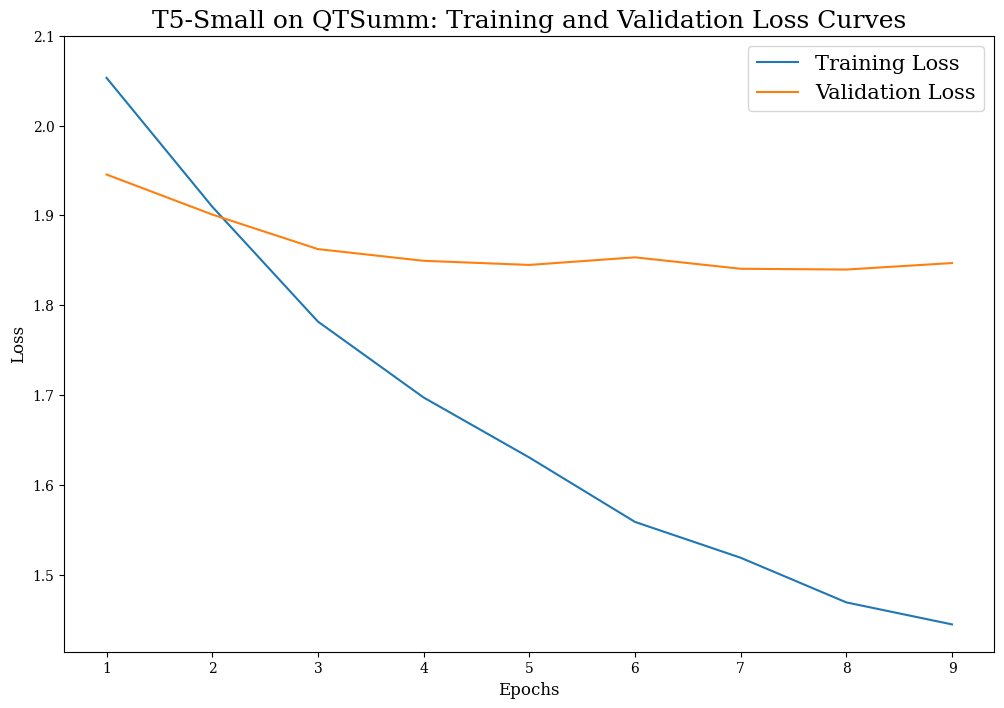

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Extract training and validation loss from the training history
train_loss = [	2.053100	, 1.909700, 1.781800, 1.697300, 1.630500, 1.558800, 1.518900, 1.469200, 1.444700 ]
eval_loss = [1.945496	,1.900960,1.862478,1.849450,1.844853,1.853301,1.840586,1.839719,1.846929]

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10


# Plot the learning curves
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training Loss')
plt.plot(eval_loss, label='Validation Loss')
plt.title('T5-Small on QTSumm: Training and Validation Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(0,9),range(1,10))
plt.ylim(top = 2.1)
plt.legend()
plt.grid(False)
plt.show()


In [ ]:
predictions=trainer.predict(tokenized_test)
predictions[2]

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


{'test_loss': 1.8195610046386719,
 'test_rouge_1': 0.3394,
 'test_rouge_2': 0.2063,
 'test_rouge_L': 0.2927,
 'test_rouge_Lsum': 0.2923,
 'test_SacreBleu': 1.3119,
 'test_meteor': 0.1976,
 'test_gen_len': 18.987,
 'test_runtime': 81.9539,
 'test_samples_per_second': 13.154,
 'test_steps_per_second': 1.647}

In [ ]:
trainer.save_model("my_fine_tuned_t5_small_model")

In [ ]:
fine_tuned_model = trainer.model
fine_tuned_model.push_to_hub("fine_tuned_t5_on_QTSumm_Focus_on_Unfiltered")
tokenizer.push_to_hub("fine_tuned_t5_on_QTSumm_Focus_on_Unfiltered")


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Depie/fine_tuned_t5_on_QTSumm_Focus_on_Unfiltered/commit/b461b6cf7087ea0bcc54aac148e81e7d60fe12c9', commit_message='Upload tokenizer', commit_description='', oid='b461b6cf7087ea0bcc54aac148e81e7d60fe12c9', pr_url=None, pr_revision=None, pr_num=None)

###**Evaluation**

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization", model="Depie/fine_tuned_t5_on_QTSumm_Focus_on_Unfiltered",tokenizer="Depie/fine_tuned_t5_on_QTSumm_Focus_on_Unfiltered",device='cuda')

In [ ]:
summaries = {}
for i, text in enumerate(input_test['table to text'].head(3)):
        text = "summarize: " + text
        summaries[i] = summarizer(text,min_length=1,max_length=150)
        print(f"Table {i}\nGenerated Summary: {summaries[i][0]['summary_text']}\nAnotation: {input_test['summary'].iloc[i]}\n")


Token indices sequence length is longer than the specified maximum sequence length for this model (756 > 512). Running this sequence through the model will result in indexing errors


Table 0
Generated Summary: John Roberts from Maryland, Samuel Alito from New Jersey, and Sonia Sotomayor from New York are the Catholic justices who were appointed by a President Bush. Roberts was appointed in 2005, and Alito was appointed as incumbent in 2005.
Anotation: John Roberts from Maryland and Samuel Alito from New Zersey   were appointed by a President Bush.

Table 1
Generated Summary: The Army Cadets faced off against Stevens Tech in the first game of the season . The result of the game was a win for the team, with 27 points and a record of 1 - 0.
Anotation: The Army Cadets played Stevens Tech in the first game of their season on October 5th and won 27-0. This was a shutout win for the Cadets, as they were able to keep their opponents' score at zero while scoring 27 of their own points. Overall, it was a successful start to the 1912 season and they were able to gain momentum going into the next game against Rutgers.

Table 2
Generated Summary: the HP LaserJet 4000 series has

In [ ]:
from tqdm import tqdm
from transformers import AutoTokenizer
import gc
import torch

summaries_T5 = {}

for i, text in tqdm(enumerate(input_test['table to text']), total=len(input_test['table to text']), desc="Processing"):
    text = "summarize: " + text
    summaries_T5[i] = summarizer(text,max_length=150,min_length=1)


Processing:   1%|          | 7/1078 [00:05<15:38,  1.14it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
Processing: 100%|██████████| 1078/1078 [15:12<00:00,  1.18it/s]


In [ ]:
import pickle
# Save the dictionary as a pickle file
with open(f'summaries_T5_QTSumm.pkl', 'wb') as file:
  pickle.dump(summaries_T5 , file)

In [ ]:
from tqdm import tqdm

T5_bleu={}
T5_rouge={}
T5_meteor={}

for s in tqdm(summaries_T5.keys()):
  preds = [summaries_T5[s][0]['summary_text']]
  labels = [input_test['summary'].iloc[s]]
  #compute the scores
  score_r=rouge.compute(predictions=preds, references=labels, use_stemmer=True)
  score_b=bleu.compute(predictions=preds, references=labels)
  score_m=meteor.compute(predictions=preds, references=labels)
  #put them in a dict
  T5_rouge[s]=score_r
  T5_bleu[s]=score_b
  T5_meteor[s]=score_m

100%|██████████| 1078/1078 [02:57<00:00,  6.06it/s]


In [ ]:
import statistics as st

sum_r1,sum_r2,sum_rL,sum_rLsum,sumbleu,sum_meteor=0,0,0,0,0,0
r1_list,r2_list,rL_list,rLsum_list,bleu_list,meteor_list=list(),list(),list(),list(),list(),list()

for key in T5_rouge.keys():
  sum_r1+=T5_rouge[key]['rouge1']
  sum_r2+=T5_rouge[key]['rouge2']
  sum_rL+=T5_rouge[key]['rougeL']
  sum_rLsum+=T5_rouge[key]['rougeLsum']
  sumbleu+=T5_bleu[key]['score']
  sum_meteor+=T5_meteor[key]['meteor']

  r1_list.append(T5_rouge[key]['rouge1'])
  r2_list.append(T5_rouge[key]['rouge2'])
  rL_list.append(T5_rouge[key]['rougeL'])
  rLsum_list.append(T5_rouge[key]['rougeLsum'])
  bleu_list.append(T5_bleu[key]['score'])
  meteor_list.append(T5_meteor[key]['meteor'])

avg_r1=sum_r1/len(T5_rouge.keys())
avg_r2=sum_r2/len(T5_rouge.keys())
avg_rL=sum_rL/len(T5_rouge.keys())
avg_rLsum=sum_rLsum/len(T5_rouge.keys())
avg_bleu=sumbleu/len(T5_bleu.keys())
avg_meteor=sum_meteor/len(T5_meteor.keys())

print(f"""-----T5-small-on-QTSumm-Unfiltered-with-Focus on--------\n

        Average
Rouge-1: {round(avg_r1,4)}
Rouge-2: {round(avg_r2,4)}
Rouge-L: {round(avg_rL,4)}
Rouge-Lsum: {round(avg_rLsum,4)}
SacreBleu: {round(avg_bleu,4)}
Meteor: {round(avg_meteor,4)}

        Median
Rouge-1: {round(st.median(r1_list),4)}
Rouge-2: {round(st.median(r2_list),4)}
Rouge-L: {round(st.median(rL_list),4)}
Rouge-Lsum: {round(st.median(rLsum_list),4)}
SacreBleu: {round(st.median(bleu_list),4)}
Meteor: {round(st.median(meteor_list),4)}

    Standard Deviation
Rouge-1: {round(st.stdev(r1_list),4)}
Rouge-2: {round(st.stdev(r2_list),4)}
Rouge-L: {round(st.stdev(rL_list),4)}
Rouge-Lsum: {round(st.stdev(rLsum_list),4)}
SacreBleu: {round(st.stdev(bleu_list),4)}
Meteor: {round(st.stdev(meteor_list),4)}

  Minimum/Maximum
Rouge-1 | Min: {round(min(r1_list),4)} | Max: {round(max(r1_list),4)}
Rouge-2 | Min: {round(min(r2_list),4)} | Max: {round(max(r2_list),4)}
Rouge-L | Min: {round(min(rL_list),4)} | Max: {round(max(rL_list),4)}
Rouge-Lsum | Min: {round(min(rLsum_list),4)} | Max: {round(max(rLsum_list),4)}
SacreBleu | Min: {round(min(bleu_list),4)} | Max: {round(max(bleu_list),4)}
Meteor| Min: {round(min(meteor_list),4)} | Max: {round(max(meteor_list),4)}

""")

-----T5-small-on-QTSumm-Unfiltered-with-Focus on--------


        Average
Rouge-1: 0.5214
Rouge-2: 0.2856
Rouge-L: 0.3984
Rouge-Lsum: 0.3983
SacreBleu: 16.1109
Meteor: 0.398

        Median
Rouge-1: 0.5245
Rouge-2: 0.2716
Rouge-L: 0.3846
Rouge-Lsum: 0.3846
SacreBleu: 13.5828
Meteor: 0.3764

    Standard Deviation
Rouge-1: 0.1341
Rouge-2: 0.136
Rouge-L: 0.1374
Rouge-Lsum: 0.1374
SacreBleu: 11.3419
Meteor: 0.1479

  Minimum/Maximum
Rouge-1 | Min: 0.0 | Max: 0.9655
Rouge-2 | Min: 0.0 | Max: 0.8889
Rouge-L | Min: 0.0 | Max: 0.9655
Rouge-Lsum | Min: 0.0 | Max: 0.9655
SacreBleu | Min: 0.0 | Max: 69.997
Meteor| Min: 0.0 | Max: 0.9364




In [ ]:
#put all averages in a dictionary
T5_All_avg_all_qt={'Rouge1':round(avg_r1,4),'Rouge2':round(avg_r2,4),'Rouge-L':round(avg_rL,4),'Rouge-Lsum':round(avg_rLsum,4),"SacreBleu":round(avg_bleu,4),"Meteor":round(avg_meteor,4)}
#put all median values in a dictionary
T5_All_median_all_qt={'Rouge1':round(st.median(r1_list),4),'Rouge2':round(st.median(r2_list),4),'Rouge-L':round(st.median(rL_list),4),'Rouge-Lsum': round(st.median(rLsum_list),4),"SacreBleu":round(st.median(bleu_list),4),"Meteor":round(st.median(meteor_list),4)}
#put all standard deviation values in a dictionary
T5_All_sd_all_qt={'Rouge1':round(st.stdev(r1_list),4),'Rouge2':round(st.stdev(r2_list),4),'Rouge-L':round(st.stdev(rL_list),4),'Rouge-Lsum': round(st.stdev(rLsum_list),4),"SacreBleu":round(st.stdev(bleu_list),4),"Meteor":round(st.stdev(meteor_list),4)}

##Bart-base

###Training- **Unfiltered data** - No Focus on

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("facebook/bart-base")

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
#Turning dataframes into HF objects
from datasets import Dataset

train = Dataset.from_pandas(input_train)
valid = Dataset.from_pandas(input_validation)
test = Dataset.from_pandas(input_test)

In [ ]:
train_data = train.map(
    lambda batch: batch_tokenize_preprocess(
        batch, tokenizer, 1024, 256
    ),
    batched=True,
    remove_columns=train.column_names,
)

validation_data = valid.map(
    lambda batch: batch_tokenize_preprocess(
        batch, tokenizer, 1024, 256
    ),
    batched=True,
    remove_columns=valid.column_names,
)

test_data =test.map(
    lambda batch: batch_tokenize_preprocess(
        batch, tokenizer, 1024, 256
    ),
    batched=True,
    remove_columns=valid.column_names,
)

Map:   0%|          | 0/4981 [00:00<?, ? examples/s]

Map:   0%|          | 0/1052 [00:00<?, ? examples/s]

Map:   0%|          | 0/1078 [00:00<?, ? examples/s]

In [ ]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model='facebook/bart-base')

In [ ]:
from transformers import AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer,EarlyStoppingCallback

In [ ]:
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-base")

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

In [ ]:
early_stopping = EarlyStoppingCallback(early_stopping_patience=3, early_stopping_threshold=0.01)

In [ ]:
training_args = Seq2SeqTrainingArguments(
    output_dir="Bart-base_QTSumm",
    evaluation_strategy="epoch",
    #save_steps=90,
    #logging_steps=200,
    save_strategy= "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    weight_decay=0.01,
    num_train_epochs=10,
    predict_with_generate=True,
    fp16=True,
    load_best_model_at_end=True,

)

In [ ]:
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=validation_data,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping],
)

**The SacreBleu score values range from 0 to 100.**

In [ ]:
trainer.train()

You're using a BartTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Rouge 1,Rouge 2,Rouge L,Rouge Lsum,Sacrebleu,Meteor,Gen Len
1,2.157900,1.775185,0.314700,0.193100,0.267900,0.268500,0.945200,0.174900,19.985700
2,1.864800,1.685171,0.314100,0.193500,0.267700,0.268000,0.975500,0.176200,20.000000
3,1.662900,1.651409,0.312900,0.194900,0.269600,0.270100,0.981400,0.177000,19.989500
4,1.538000,1.628861,0.314900,0.195600,0.270000,0.270500,0.964200,0.177000,19.981900
5,1.426800,1.620860,0.314700,0.194600,0.269500,0.269800,0.976000,0.176500,19.999000
6,1.367700,1.617342,0.317200,0.197300,0.271200,0.271700,0.988500,0.178400,19.984800
7,1.279100,1.618070,0.317400,0.197600,0.272300,0.272600,0.997900,0.178900,19.990500


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control

TrainOutput(global_step=8722, training_loss=1.6222589112727692, metrics={'train_runtime': 4578.616, 'train_samples_per_second': 10.879, 'train_steps_per_second': 2.721, 'total_flos': 2.125968108945408e+16, 'train_loss': 1.6222589112727692, 'epoch': 7.0})

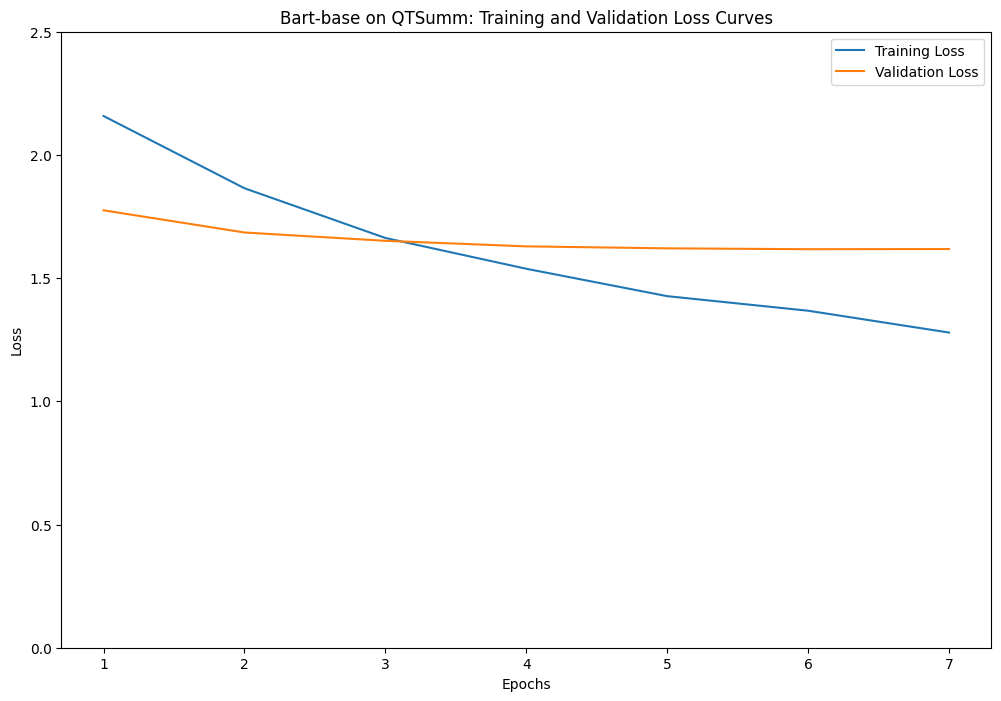

In [ ]:
import matplotlib.pyplot as plt

# Extract training and validation loss from the training history
train_loss = [2.157900, 1.864800, 1.662900, 1.538000, 1.426800, 1.367700, 1.279100 ]
eval_loss = [item['eval_loss'] for item in trainer.state.log_history if 'eval_loss' in item]

# Plot the learning curves
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training Loss')
plt.plot(eval_loss, label='Validation Loss')
plt.title('Bart-base on QTSumm: Training and Validation Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim((0,2.5))
plt.xticks([0,1,2,3,4,5,6],[1,2,3,4,5,6,7])
plt.legend()
plt.show()


In [ ]:
predictions=trainer.predict(test_data)
predictions[2]

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


{'test_loss': 1.6306226253509521,
 'test_rouge_1': 0.329,
 'test_rouge_2': 0.2067,
 'test_rouge_L': 0.285,
 'test_rouge_Lsum': 0.2849,
 'test_SacreBleu': 1.1562,
 'test_meteor': 0.1895,
 'test_gen_len': 19.9991,
 'test_runtime': 167.6964,
 'test_samples_per_second': 6.428,
 'test_steps_per_second': 1.61}

In [ ]:
trainer.save_model("Bart-base_QTSumm")

In [ ]:
fine_tuned_model = trainer.model

fine_tuned_model.push_to_hub("Bart-base_QTSumm_Unfiltered_No_F_on")
tokenizer.push_to_hub("Bart-base_QTSumm_Unfiltered_No_F_on")

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Depie/Bart-base_QTSumm_Unfiltered_No_F_on/commit/511051cdaad06d22620161babda14d91aeff4c35', commit_message='Upload tokenizer', commit_description='', oid='511051cdaad06d22620161babda14d91aeff4c35', pr_url=None, pr_revision=None, pr_num=None)

###Evaluation- **Unfiltered Data** - No Focus on

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization", model="Depie/Bart-base_QTSumm_Unfiltered_No_F_on",tokenizer="Depie/Bart-base_QTSumm_Unfiltered_No_F_on",device=0)

In [ ]:
summaries = {}
for i, text in enumerate(input_test['table to text'].head(3)):
        summaries[i] = summarizer(text,min_length=5,max_length=100)
        print(f"Table {i}\nGenerated Summary: {summaries[i][0]['summary_text']}\nAnotation: {input_test['summary'].iloc[i]}\n")


Table 0
Generated Summary: The Catholic justices who were appointed by a President Bush are Samuel Alito from Maryland, John Roberts from Maryland and Sonia Sotomayor from New York.
Anotation: John Roberts from Maryland and Samuel Alito from New Zersey   were appointed by a President Bush.

Table 1
Generated Summary: The Army Cadets faced off against Stevens Tech on October 5th and won the game 27-0.
Anotation: The Army Cadets played Stevens Tech in the first game of their season on October 5th and won 27-0. This was a shutout win for the Cadets, as they were able to keep their opponents' score at zero while scoring 27 of their own points. Overall, it was a successful start to the 1912 season and they were able to gain momentum going into the next game against Rutgers.

Table 2
Generated Summary: The 4200 and 4250 models of HP LaserJet 4000 series have different specifications. The 4200 has a 300 MHz CPU speed, 48 MB of memory, and 416 MB of maximum memory, while the 4250 has a 460 MHz

In [ ]:
from tqdm import tqdm
from transformers import AutoTokenizer
import gc
import torch

summaries_Bart = {}

for i, text in tqdm(enumerate(input_test['table to text']), total=len(input_test['table to text']), desc="Processing"):
  summaries_Bart[i] = summarizer(text,max_length=100,min_length=10,truncation=True)



Processing:   1%|          | 10/1078 [00:08<12:07,  1.47it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
Processing: 100%|██████████| 1078/1078 [12:04<00:00,  1.49it/s]


In [ ]:
import pickle
# Save the dictionary as a pickle file
with open(f'summaries_Bart_QTSumm_All_No_Focus_on.pkl', 'wb') as file:
  pickle.dump(summaries_Bart , file)

In [ ]:
from tqdm import tqdm

Bart_bleu={}
Bart_rouge={}
Bart_meteor={}

for s in tqdm(summaries_Bart.keys()):
  preds = [summaries_Bart[s][0]['summary_text']]
  labels = [input_test['summary'].iloc[s]]
  #compute the scores
  score_r=rouge.compute(predictions=preds, references=labels, use_stemmer=True)
  score_b=bleu.compute(predictions=preds, references=labels)
  score_m=meteor.compute(predictions=preds, references=labels)
  #put them in a dict
  Bart_rouge[s]=score_r
  Bart_bleu[s]=score_b
  Bart_meteor[s]=score_m

100%|██████████| 1078/1078 [03:51<00:00,  4.66it/s]


In [ ]:
import statistics as st

sum_r1,sum_r2,sum_rL,sum_rLsum,sumbleu,sum_meteor=0,0,0,0,0,0
r1_list,r2_list,rL_list,rLsum_list,bleu_list,meteor_list=list(),list(),list(),list(),list(),list()

for key in Bart_rouge.keys():
  sum_r1+=Bart_rouge[key]['rouge1']
  sum_r2+=Bart_rouge[key]['rouge2']
  sum_rL+=Bart_rouge[key]['rougeL']
  sum_rLsum+=Bart_rouge[key]['rougeLsum']
  sumbleu+=Bart_bleu[key]['score']
  sum_meteor+=Bart_meteor[key]['meteor']

  r1_list.append(Bart_rouge[key]['rouge1'])
  r2_list.append(Bart_rouge[key]['rouge2'])
  rL_list.append(Bart_rouge[key]['rougeL'])
  rLsum_list.append(Bart_rouge[key]['rougeLsum'])
  bleu_list.append(Bart_bleu[key]['score'])
  meteor_list.append(Bart_meteor[key]['meteor'])

avg_r1=sum_r1/len(Bart_rouge.keys())
avg_r2=sum_r2/len(Bart_rouge.keys())
avg_rL=sum_rL/len(Bart_rouge.keys())
avg_rLsum=sum_rLsum/len(Bart_rouge.keys())
avg_bleu=sumbleu/len(Bart_bleu.keys())
avg_meteor=sum_meteor/len(Bart_meteor.keys())

print(f"""---------Bart-base-on-QTSumm-All--------\n
        Average
Rouge-1: {round(avg_r1,4)}
Rouge-2: {round(avg_r2,4)}
Rouge-L: {round(avg_rL,4)}
Rouge-Lsum: {round(avg_rLsum,4)}
SacreBleu: {round(avg_bleu,4)}
Meteor: {round(avg_meteor,4)}

        Median
Rouge-1: {round(st.median(r1_list),4)}
Rouge-2: {round(st.median(r2_list),4)}
Rouge-L: {round(st.median(rL_list),4)}
Rouge-Lsum: {round(st.median(rLsum_list),4)}
SacreBleu: {round(st.median(bleu_list),4)}
Meteor: {round(st.median(meteor_list),4)}

    Standard Deviation
Rouge-1: {round(st.stdev(r1_list),4)}
Rouge-2: {round(st.stdev(r2_list),4)}
Rouge-L: {round(st.stdev(rL_list),4)}
Rouge-Lsum: {round(st.stdev(rLsum_list),4)}
SacreBleu: {round(st.stdev(bleu_list),4)}
Meteor: {round(st.stdev(meteor_list),4)}

  Minimum/Maximum
Rouge-1 | Min: {round(min(r1_list),4)} | Max: {round(max(r1_list),4)}
Rouge-2 | Min: {round(min(r2_list),4)} | Max: {round(max(r2_list),4)}
Rouge-L | Min: {round(min(rL_list),4)} | Max: {round(max(rL_list),4)}
Rouge-Lsum | Min: {round(min(rLsum_list),4)} | Max: {round(max(rLsum_list),4)}
SacreBleu | Min: {round(min(bleu_list),4)} | Max: {round(max(bleu_list),4)}
Meteor| Min: {round(min(meteor_list),4)} | Max: {round(max(meteor_list),4)}

""")

---------Bart-base-on-QTSumm-All--------

        Average
Rouge-1: 0.4865
Rouge-2: 0.2668
Rouge-L: 0.3863
Rouge-Lsum: 0.3863
SacreBleu: 14.9507
Meteor: 0.3671

        Median
Rouge-1: 0.4778
Rouge-2: 0.2463
Rouge-L: 0.3669
Rouge-Lsum: 0.3669
SacreBleu: 12.0212
Meteor: 0.3385

    Standard Deviation
Rouge-1: 0.1329
Rouge-2: 0.1382
Rouge-L: 0.1374
Rouge-Lsum: 0.1375
SacreBleu: 11.5679
Meteor: 0.1497

  Minimum/Maximum
Rouge-1 | Min: 0.0 | Max: 0.9565
Rouge-2 | Min: 0.0 | Max: 0.9286
Rouge-L | Min: 0.0 | Max: 0.9565
Rouge-Lsum | Min: 0.0 | Max: 0.9565
SacreBleu | Min: 0.0 | Max: 90.2735
Meteor| Min: 0.0 | Max: 0.9608




###Training- **Unfiltered data** - **Focus on**

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("facebook/bart-base")

In [ ]:
#Turning dataframes into HF objects
from datasets import Dataset

train = Dataset.from_pandas(input_train)
valid = Dataset.from_pandas(input_validation)
test = Dataset.from_pandas(input_test)

In [ ]:
train_data = train.map(
    lambda batch: batch_tokenize_preprocess(
        batch, tokenizer, 1024, 256
    ),
    batched=True,
    remove_columns=train.column_names,
)

validation_data = valid.map(
    lambda batch: batch_tokenize_preprocess(
        batch, tokenizer, 1024, 256
    ),
    batched=True,
    remove_columns=valid.column_names,
)

test_data =test.map(
    lambda batch: batch_tokenize_preprocess(
        batch, tokenizer, 1024, 256
    ),
    batched=True,
    remove_columns=valid.column_names,
)

Map:   0%|          | 0/4981 [00:00<?, ? examples/s]

Map:   0%|          | 0/1052 [00:00<?, ? examples/s]

Map:   0%|          | 0/1078 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer,EarlyStoppingCallback

In [ ]:
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-base")

In [ ]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model='facebook/bart-base')

In [ ]:
early_stopping = EarlyStoppingCallback(early_stopping_patience=3, early_stopping_threshold=0.01)

**Hyperparameter Tuning**

In [ ]:
def optuna_hp_space(trial):
    return {
        "learning_rate": trial.suggest_categorical("learning_rate", [2e-5, 2e-6,2e-4]) ,
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [4,6,8]),
    }

In [ ]:
def model_init(trial):
    return  AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-base")


In [ ]:
training_args = Seq2SeqTrainingArguments(
    output_dir="Bart-base_QTSumm",
    evaluation_strategy="epoch",
    save_strategy= "epoch",
    learning_rate=2e-5,
    metric_for_best_model = 'eval_loss',
    weight_decay=0.01,
    num_train_epochs=3,
    predict_with_generate=True,
    fp16=True,
    load_best_model_at_end=True,
    auto_find_batch_size=True

)

In [ ]:
trainer = Seq2SeqTrainer(
    model=None,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=validation_data,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
    model_init=model_init,
    data_collator=data_collator,
    callbacks=[early_stopping]
)

In [ ]:
!pip install optuna -q

In [ ]:
def my_objective(metrics):
    eval_loss = metrics["eval_loss"]
    return eval_loss

In [ ]:
torch.cuda.empty_cache()

In [ ]:
from optuna.samplers import TPESampler
from optuna.pruners import HyperbandPruner

best_trial = trainer.hyperparameter_search(
    direction="minimize",
    sampler=TPESampler(),
    pruner=HyperbandPruner(),
    backend="optuna",
    hp_space=optuna_hp_space,
    n_trials=3,
    compute_objective=my_objective,
)

[I 2024-02-02 11:50:41,401] A new study created in memory with name: no-name-25f51c57-0880-412b-abcd-3b2b0c3a452b
You're using a BartTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Rouge 1,Rouge 2,Rouge L,Rouge Lsum,Sacrebleu,Meteor,Gen Len
1,2.328000,1.986051,0.320500,0.196300,0.273100,0.273300,0.927800,0.179300,19.972400
2,1.724700,1.784091,0.325200,0.201500,0.275700,0.275800,1.002500,0.182400,19.981900
3,1.224900,1.722629,0.324900,0.203200,0.277800,0.278300,1.020000,0.182800,19.992400


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
There were missing keys in the checkpoint model loaded: ['model.encoder.embed_tokens.weight', 'model.decoder.embed_tokens.weight', 'lm_head.weight'].
[I 2

Epoch,Training Loss,Validation Loss,Rouge 1,Rouge 2,Rouge L,Rouge Lsum,Sacrebleu,Meteor,Gen Len
1,2.435700,2.034946,0.312200,0.183100,0.258600,0.259000,0.862300,0.169300,19.975300


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Rouge 1,Rouge 2,Rouge L,Rouge Lsum,Sacrebleu,Meteor,Gen Len
1,2.435700,2.034946,0.312200,0.183100,0.258600,0.259000,0.862300,0.169300,19.975300
2,2.290800,1.965123,0.317300,0.188000,0.262600,0.262900,0.879100,0.173100,19.995200
3,2.217700,1.944242,0.318200,0.189000,0.263400,0.263600,0.870400,0.173400,19.997100


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
There were missing keys in the checkpoint model loaded: ['model.encoder.embed_tokens.weight', 'model.decoder.embed_tokens.weight', 'lm_head.weight'].
[I 2024-02-02 12:54:41,086] Trial 1 finished with value: 1.9442415237426758 and parameters: {'learning_rate': 2e-06, 'per_device_train_batch_size': 4}. Best is trial 0 with value: 1.7226285934448242.


Epoch,Training Loss,Validation Loss,Rouge 1,Rouge 2,Rouge L,Rouge Lsum,Sacrebleu,Meteor,Gen Len
1,2.714100,2.061066,0.310300,0.180100,0.255500,0.255800,0.846500,0.168000,19.965800
2,2.315000,1.993500,0.316800,0.186900,0.261900,0.262200,0.855500,0.172200,19.995200
3,2.291600,1.975772,0.316800,0.187000,0.262200,0.262600,0.871600,0.172000,19.998100


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
There were missing keys in the checkpoint model loaded: ['model.encoder.embed_tokens.weight', 'model.decoder.embed_tokens.weight', 'lm_head.weight'].
[I 2

In [ ]:
best_params=best_trial.hyperparameters

In [ ]:
print(best_trial)

import pickle
# Save to a pickle file
with open('best_params.pkl', 'wb') as pickle_file:
    pickle.dump(best_params, pickle_file)

BestRun(run_id='0', objective=1.7226285934448242, hyperparameters={'learning_rate': 0.0002, 'per_device_train_batch_size': 4}, run_summary=None)


In [ ]:
best_params={'learning_rate':  0.0002, 'per_device_train_batch_size': 4}

In [ ]:
training_args = Seq2SeqTrainingArguments(
    output_dir="Bart-base_QTSumm",
    evaluation_strategy="epoch",
    save_strategy= "epoch",
    learning_rate=best_params['learning_rate'],
    per_device_train_batch_size=best_params['per_device_train_batch_size'],
    per_device_eval_batch_size=8,
    weight_decay=0.01,
    num_train_epochs=10,
    predict_with_generate=True,
    fp16=True,
    load_best_model_at_end=True,

)

In [ ]:
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=validation_data,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping],
)

**The SacreBleu score values range from 0 to 100.**

In [ ]:
import torch
import gc
gc.collect()


133

In [ ]:
torch.cuda.empty_cache()
trainer.train()

You're using a BartTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Rouge 1,Rouge 2,Rouge L,Rouge Lsum,Sacrebleu,Meteor,Gen Len
1,2.410100,2.114054,0.315900,0.191600,0.268900,0.269000,0.913400,0.177900,19.970500
2,1.903800,2.013327,0.321800,0.196600,0.273900,0.274300,0.976100,0.179300,19.993300
3,1.530400,1.966204,0.318200,0.193400,0.270500,0.271100,0.967000,0.179400,19.996200
4,1.236200,1.983656,0.318300,0.194500,0.271700,0.272000,0.974800,0.178800,19.996200
5,0.990400,2.050630,0.322000,0.198500,0.275200,0.275600,0.989100,0.182000,19.992400
6,0.779200,2.107341,0.317800,0.194500,0.270400,0.270600,0.949800,0.180500,19.993300


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control

TrainOutput(global_step=7476, training_loss=1.4803475165124753, metrics={'train_runtime': 3980.7554, 'train_samples_per_second': 12.513, 'train_steps_per_second': 3.13, 'total_flos': 1.822258379096064e+16, 'train_loss': 1.4803475165124753, 'epoch': 6.0})

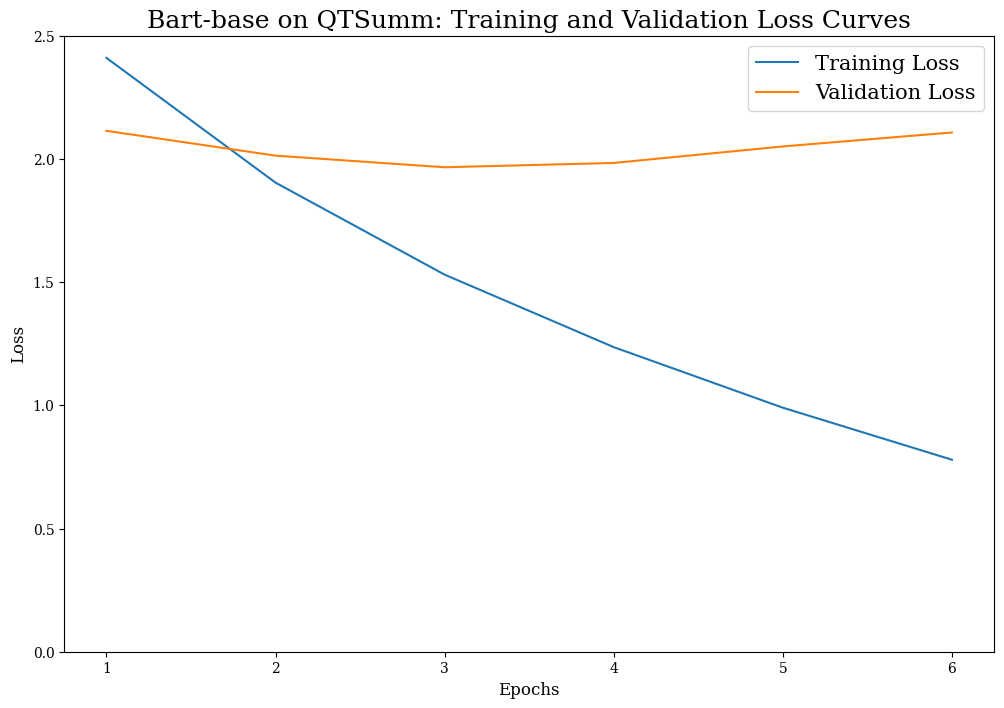

In [ ]:
import matplotlib.pyplot as plt

# Extract training and validation loss from the training history
train_loss =[2.410100	,1.903800,1.530400,1.236200,0.990400, 0.779200]
eval_loss = [2.114054,2.013327,1.966204	, 1.983656,2.050630,2.107341]

# Plot the learning curves
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training Loss')
plt.plot(eval_loss, label='Validation Loss')
plt.title('Bart-base on QTSumm: Training and Validation Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim((0,2.5))
plt.xticks([0,1,2,3,4,5],[1,2,3,4,5,6])
plt.legend()
plt.show()


In [ ]:
trainer.save_model("Bart-base_QTSumm")

In [ ]:
fine_tuned_model = trainer.model

fine_tuned_model.push_to_hub("Bart-base_QTSumm_Unfiltered")
tokenizer.push_to_hub("Bart-base_QTSumm_Unfiltered")

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Depie/Bart-base_QTSumm_Unfiltered/commit/ef951b5a77ce98e580ad43fba1addfd1e8c7cf54', commit_message='Upload tokenizer', commit_description='', oid='ef951b5a77ce98e580ad43fba1addfd1e8c7cf54', pr_url=None, pr_revision=None, pr_num=None)

###Evaluation- **Unfiltered Data** - **Focus on**

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization", model="Depie/Bart-base_QTSumm_Unfiltered",tokenizer="Depie/Bart-base_QTSumm_Unfiltered",device=0)

In [ ]:
import re

def count_words(text):
    words = re.findall(r'\b\w+\b', text)
    return len(words)

test_df['word_count'] = test_df['summary'].apply(count_words)

# Calculate the average word count
test_df['word_count'].min()

1

In [ ]:
summaries = {}
for i, text in enumerate(input_test['table to text'].head(3)):
        summaries[i] = summarizer(text,min_length=1,max_length=150)
        print(f"Table {i}\nGenerated Summary: {summaries[i][0]['summary_text']}\nAnotation: {input_test['summary'].iloc[i]}\n")


Table 0
Generated Summary: The Catholic Supreme Court appointed two Catholic justices who were appointed by a President Bush: John Roberts from Maryland and Samuel Alito from New Jersey. John Roberts was born in 1955 and died in 2005. He was incumbent of the court and did not manage to terminate his term. SamuelAlito, born in 1950, was incumbent for the duration of his tenure.
Anotation: John Roberts from Maryland and Samuel Alito from New Zersey   were appointed by a President Bush.

Table 1
Generated Summary: The Army Cadets faced off against Stevens Tech on October 5th. The Cadets won the game with a score of 27-0. This put them at a 1-0 record.
Anotation: The Army Cadets played Stevens Tech in the first game of their season on October 5th and won 27-0. This was a shutout win for the Cadets, as they were able to keep their opponents' score at zero while scoring 27 of their own points. Overall, it was a successful start to the 1912 season and they were able to gain momentum going int

In [ ]:
from tqdm import tqdm
from transformers import AutoTokenizer
import gc
import torch

summaries_Bart = {}

for i, text in tqdm(enumerate(input_test['table to text']), total=len(input_test['table to text']), desc="Processing"):
  summaries_Bart[i] = summarizer(text,max_length=150,min_length=1,truncation=True)



Processing: 100%|██████████| 1078/1078 [14:00<00:00,  1.28it/s]


In [ ]:
import pickle
# Save the dictionary as a pickle file
with open(f'summaries_Bart_QTSumm_Unfiltered_focus_on.pkl', 'wb') as file:
  pickle.dump(summaries_Bart , file)

In [ ]:
from tqdm import tqdm

Bart_bleu={}
Bart_rouge={}
Bart_meteor={}

for s in tqdm(summaries_Bart.keys()):
  preds = [summaries_Bart[s][0]['summary_text']]
  labels = [input_test['summary'].iloc[s]]
  #compute the scores
  score_r=rouge.compute(predictions=preds, references=labels, use_stemmer=True)
  score_b=bleu.compute(predictions=preds, references=labels)
  score_m=meteor.compute(predictions=preds, references=labels)
  #put them in a dict
  Bart_rouge[s]=score_r
  Bart_bleu[s]=score_b
  Bart_meteor[s]=score_m

100%|██████████| 1078/1078 [03:00<00:00,  5.96it/s]


In [ ]:
import statistics as st

sum_r1,sum_r2,sum_rL,sum_rLsum,sumbleu,sum_meteor=0,0,0,0,0,0
r1_list,r2_list,rL_list,rLsum_list,bleu_list,meteor_list=list(),list(),list(),list(),list(),list()

for key in Bart_rouge.keys():
  sum_r1+=Bart_rouge[key]['rouge1']
  sum_r2+=Bart_rouge[key]['rouge2']
  sum_rL+=Bart_rouge[key]['rougeL']
  sum_rLsum+=Bart_rouge[key]['rougeLsum']
  sumbleu+=Bart_bleu[key]['score']
  sum_meteor+=Bart_meteor[key]['meteor']

  r1_list.append(Bart_rouge[key]['rouge1'])
  r2_list.append(Bart_rouge[key]['rouge2'])
  rL_list.append(Bart_rouge[key]['rougeL'])
  rLsum_list.append(Bart_rouge[key]['rougeLsum'])
  bleu_list.append(Bart_bleu[key]['score'])
  meteor_list.append(Bart_meteor[key]['meteor'])

avg_r1=sum_r1/len(Bart_rouge.keys())
avg_r2=sum_r2/len(Bart_rouge.keys())
avg_rL=sum_rL/len(Bart_rouge.keys())
avg_rLsum=sum_rLsum/len(Bart_rouge.keys())
avg_bleu=sumbleu/len(Bart_bleu.keys())
avg_meteor=sum_meteor/len(Bart_meteor.keys())

print(f"""----Bart-base-on-QTSumm-All-with-Focus-on----\n
        Average
Rouge-1: {round(avg_r1,4)}
Rouge-2: {round(avg_r2,4)}
Rouge-L: {round(avg_rL,4)}
Rouge-Lsum: {round(avg_rLsum,4)}
SacreBleu: {round(avg_bleu,4)}
Meteor: {round(avg_meteor,4)}

        Median
Rouge-1: {round(st.median(r1_list),4)}
Rouge-2: {round(st.median(r2_list),4)}
Rouge-L: {round(st.median(rL_list),4)}
Rouge-Lsum: {round(st.median(rLsum_list),4)}
SacreBleu: {round(st.median(bleu_list),4)}
Meteor: {round(st.median(meteor_list),4)}

    Standard Deviation
Rouge-1: {round(st.stdev(r1_list),4)}
Rouge-2: {round(st.stdev(r2_list),4)}
Rouge-L: {round(st.stdev(rL_list),4)}
Rouge-Lsum: {round(st.stdev(rLsum_list),4)}
SacreBleu: {round(st.stdev(bleu_list),4)}
Meteor: {round(st.stdev(meteor_list),4)}

  Minimum/Maximum
Rouge-1 | Min: {round(min(r1_list),4)} | Max: {round(max(r1_list),4)}
Rouge-2 | Min: {round(min(r2_list),4)} | Max: {round(max(r2_list),4)}
Rouge-L | Min: {round(min(rL_list),4)} | Max: {round(max(rL_list),4)}
Rouge-Lsum | Min: {round(min(rLsum_list),4)} | Max: {round(max(rLsum_list),4)}
SacreBleu | Min: {round(min(bleu_list),4)} | Max: {round(max(bleu_list),4)}
Meteor| Min: {round(min(meteor_list),4)} | Max: {round(max(meteor_list),4)}

""")

----Bart-base-on-QTSumm-All-with-Focus-on----

        Average
Rouge-1: 0.5153
Rouge-2: 0.2783
Rouge-L: 0.3951
Rouge-Lsum: 0.3951
SacreBleu: 16.2992
Meteor: 0.4

        Median
Rouge-1: 0.5127
Rouge-2: 0.2621
Rouge-L: 0.3739
Rouge-Lsum: 0.375
SacreBleu: 13.9352
Meteor: 0.3801

    Standard Deviation
Rouge-1: 0.1376
Rouge-2: 0.1387
Rouge-L: 0.1375
Rouge-Lsum: 0.1375
SacreBleu: 11.5794
Meteor: 0.1512

  Minimum/Maximum
Rouge-1 | Min: 0.0 | Max: 0.9796
Rouge-2 | Min: 0.0 | Max: 0.9362
Rouge-L | Min: 0.0 | Max: 0.9796
Rouge-Lsum | Min: 0.0 | Max: 0.9796
SacreBleu | Min: 0.0 | Max: 89.854
Meteor| Min: 0.0 | Max: 0.9954




In [ ]:
#put all averages in a dictionary
Bart_All_avg_all_qt={'Rouge1':0.5153,'Rouge2':0.2783,'Rouge-L':0.3951,'Rouge-Lsum':0.3951,"SacreBleu":16.2992,"Meteor":0.4}
#put all median values in a dictionary
Bart_All_median_all_qt={'Rouge1':0.5127,'Rouge2':0.2621,'Rouge-L':0.3739,'Rouge-Lsum':  0.375,"SacreBleu":13.9352,"Meteor":0.3801}
#put all standard deviation values in a dictionary
Bart_All_sd_all_qt={'Rouge1':0.1376,'Rouge2':0.1387,'Rouge-L':0.1375,'Rouge-Lsum':0.1375,"SacreBleu":11.5794,"Meteor":0.1512}

###Training - **Filtered data** - No Focus on

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("facebook/bart-base")

In [ ]:
#Turning dataframes into HF objects
from datasets import Dataset

train = Dataset.from_pandas(input_train)
valid = Dataset.from_pandas(input_validation)
test = Dataset.from_pandas(input_test)

In [ ]:
train_data = train.map(
    lambda batch: batch_tokenize_preprocess(
        batch, tokenizer, 1024, 256
    ),
    batched=True,
    remove_columns=train.column_names,
)

validation_data = valid.map(
    lambda batch: batch_tokenize_preprocess(
        batch, tokenizer, 1024, 256
    ),
    batched=True,
    remove_columns=valid.column_names,
)

test_data =test.map(
    lambda batch: batch_tokenize_preprocess(
        batch, tokenizer, 1024, 256
    ),
    batched=True,
    remove_columns=valid.column_names,
)

Map:   0%|          | 0/884 [00:00<?, ? examples/s]

Map:   0%|          | 0/174 [00:00<?, ? examples/s]

Map:   0%|          | 0/212 [00:00<?, ? examples/s]

In [ ]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model='facebook/bart-base')

In [ ]:
from transformers import AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer,EarlyStoppingCallback

In [ ]:
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-base")

In [ ]:
early_stopping = EarlyStoppingCallback(early_stopping_patience=3, early_stopping_threshold=0.01)

In [ ]:
training_args = Seq2SeqTrainingArguments(
    output_dir="Bart-base_QTSumm",
    evaluation_strategy="epoch",
    save_steps=90,
    logging_steps=200,
    save_strategy= "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    weight_decay=0.01,
    num_train_epochs=20,
    predict_with_generate=True,
    fp16=True,
    load_best_model_at_end=True,

)

In [ ]:
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=validation_data,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping],
)

**The SacreBleu score values range from 0 to 100.**

In [ ]:
trainer.train()

You're using a BartTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Rouge 1,Rouge 2,Rouge L,Rouge Lsum,Sacrebleu,Meteor,Gen Len
1,2.225100,1.656536,0.312000,0.200200,0.263200,0.263400,0.954000,0.168500,20.000000
2,1.766400,1.570721,0.316100,0.202700,0.267300,0.267500,0.939900,0.169700,20.000000
3,1.583700,1.548767,0.320700,0.208900,0.270600,0.270100,1.050400,0.174800,20.000000
4,1.407300,1.524401,0.321500,0.211000,0.274800,0.274800,1.014800,0.175600,20.000000
5,1.308400,1.528985,0.318500,0.208400,0.271200,0.271500,1.014300,0.173800,20.000000
6,1.220100,1.527662,0.314200,0.205900,0.268000,0.268000,0.997000,0.171200,20.000000
7,1.111800,1.520127,0.317000,0.205400,0.269300,0.269200,1.036200,0.172900,20.000000


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control

TrainOutput(global_step=1547, training_loss=1.475068125018938, metrics={'train_runtime': 898.3262, 'train_samples_per_second': 19.681, 'train_steps_per_second': 4.92, 'total_flos': 3773049203589120.0, 'train_loss': 1.475068125018938, 'epoch': 7.0})

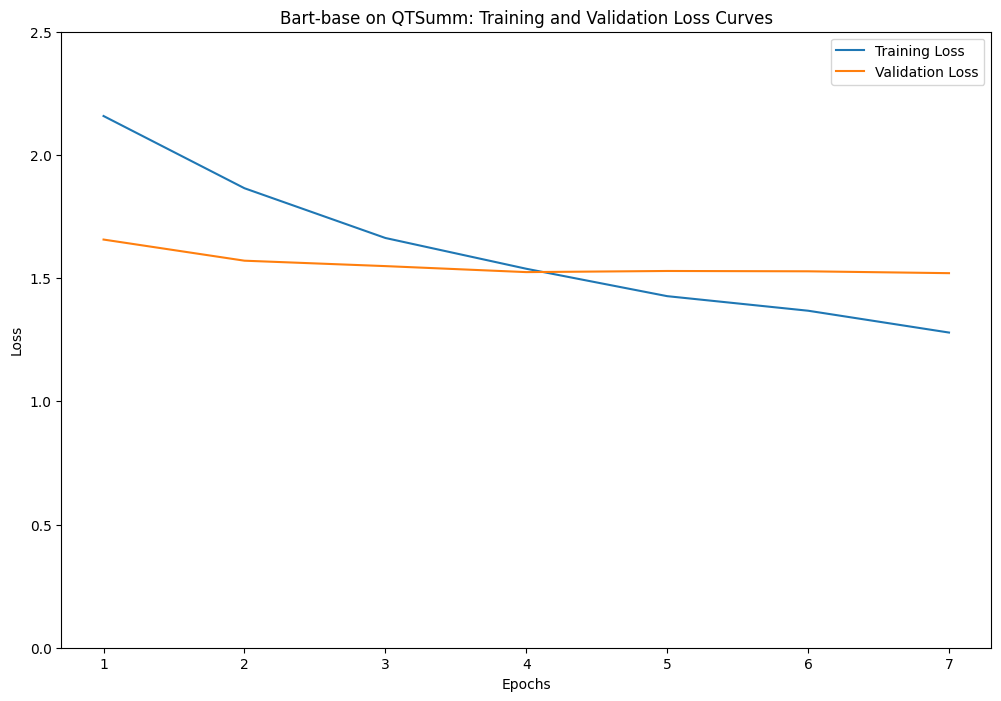

In [ ]:
import matplotlib.pyplot as plt

# Extract training and validation loss from the training history
train_loss = [item['loss'] for item in trainer.state.log_history if 'loss' in item]
eval_loss = [item['eval_loss'] for item in trainer.state.log_history if 'eval_loss' in item]

# Plot the learning curves
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training Loss')
plt.plot(eval_loss, label='Validation Loss')
plt.title('Bart-base on QTSumm: Training and Validation Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim((0,2.5))
#plt.xticks([0,1,2,3,4,5,6],[1,2,3,4,5,6,7])
plt.legend()
plt.show()


In [ ]:
predictions=trainer.predict(test_data)
predictions[2]

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


{'test_loss': 1.642005205154419,
 'test_rouge_1': 0.3159,
 'test_rouge_2': 0.1979,
 'test_rouge_L': 0.2683,
 'test_rouge_Lsum': 0.2687,
 'test_SacreBleu': 0.9679,
 'test_meteor': 0.1719,
 'test_gen_len': 20.0,
 'test_runtime': 32.4981,
 'test_samples_per_second': 6.523,
 'test_steps_per_second': 1.631}

In [ ]:
trainer.save_model("Bart-base_QTSumm")

In [ ]:
fine_tuned_model = trainer.model

fine_tuned_model.push_to_hub("Bart-base_QTSumm_Filtered_No_F_on")
tokenizer.push_to_hub("Bart-base_QTSumm_Filtered_No_F_on")

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Depie/Bart-base_QTSumm_Filtered_No_F_on/commit/27a700717fadf8fdd6d2f4ea72fd2fa7da07c03e', commit_message='Upload tokenizer', commit_description='', oid='27a700717fadf8fdd6d2f4ea72fd2fa7da07c03e', pr_url=None, pr_revision=None, pr_num=None)

###**Evaluation- Filtered Data- No Focus on**

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization", model="Depie/Bart-base_QTSumm_Filtered_No_F_on",tokenizer="Depie/Bart-base_QTSumm_Filtered_No_F_on",device=0)

tokenizer_config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/279 [00:00<?, ?B/s]

In [ ]:
summaries = {}
for i, text in enumerate(input_test['table to text'].head(3)):
        summaries[i] = summarizer(text,min_length=80,max_length=100)
        print(f"Table {i}\nGenerated Summary: {summaries[i][0]['summary_text']}\nAnotation: {input_test['summary'].iloc[i]}\n")


Table 0
Generated Summary: The Army Cadets faced off against Stevens Tech on October 5th, with a score of 27 to 27. The Cadets won the game 27 to 0. This put them at a 1-0 record. The Black Knights then went on to win the next game on November 9th against Carlisle Indian. This was their last game of the season against the Cadets, as they had won all three of their previous games.
Anotation: The Army Cadets played Stevens Tech in the first game of their season on October 5th and won 27-0. This was a shutout win for the Cadets, as they were able to keep their opponents' score at zero while scoring 27 of their own points. Overall, it was a successful start to the 1912 season and they were able to gain momentum going into the next game against Rutgers.

Table 1
Generated Summary: The stage that had their finish line in Aurillac was Stage 14 of the 1975 Tour de Puy-De-Dôme. The leader at the summit was Lucien Van Impe. The stage 17 of the same route was part of the 1968 Tour de Saint-Étienn

In [ ]:
from tqdm import tqdm
from transformers import AutoTokenizer
import gc
import torch

summaries_Bart = {}

for i, text in tqdm(enumerate(input_test['table to text']), total=len(input_test['table to text']), desc="Processing"):
  summaries_Bart[i] = summarizer(text,max_length=200,min_length=10,truncation=True)




Processing:   3%|▎         | 6/212 [00:08<05:25,  1.58s/it]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
Processing: 100%|██████████| 212/212 [02:44<00:00,  1.29it/s]


In [ ]:
import pickle
# Save the dictionary as a pickle file
with open(f'summaries_Bart_QTSumm.pkl', 'wb') as file:
  pickle.dump(summaries_Bart , file)

In [ ]:
from tqdm import tqdm

Bart_bleu={}
Bart_rouge={}
Bart_meteor={}

for s in tqdm(summaries_Bart.keys()):
  preds = [summaries_Bart[s][0]['summary_text']]
  labels = [input_test['summary'].iloc[s]]
  #compute the scores
  score_r=rouge.compute(predictions=preds, references=labels, use_stemmer=True)
  score_b=bleu.compute(predictions=preds, references=labels)
  score_m=meteor.compute(predictions=preds, references=labels)
  #put them in a dict
  Bart_rouge[s]=score_r
  Bart_bleu[s]=score_b
  Bart_meteor[s]=score_m

100%|██████████| 212/212 [00:38<00:00,  5.51it/s]


In [ ]:
import statistics as st

sum_r1,sum_r2,sum_rL,sum_rLsum,sumbleu,sum_meteor=0,0,0,0,0,0
r1_list,r2_list,rL_list,rLsum_list,bleu_list,meteor_list=list(),list(),list(),list(),list(),list()

for key in Bart_rouge.keys():
  sum_r1+=Bart_rouge[key]['rouge1']
  sum_r2+=Bart_rouge[key]['rouge2']
  sum_rL+=Bart_rouge[key]['rougeL']
  sum_rLsum+=Bart_rouge[key]['rougeLsum']
  sumbleu+=Bart_bleu[key]['score']
  sum_meteor+=Bart_meteor[key]['meteor']

  r1_list.append(Bart_rouge[key]['rouge1'])
  r2_list.append(Bart_rouge[key]['rouge2'])
  rL_list.append(Bart_rouge[key]['rougeL'])
  rLsum_list.append(Bart_rouge[key]['rougeLsum'])
  bleu_list.append(Bart_bleu[key]['score'])
  meteor_list.append(Bart_meteor[key]['meteor'])

avg_r1=sum_r1/len(Bart_rouge.keys())
avg_r2=sum_r2/len(Bart_rouge.keys())
avg_rL=sum_rL/len(Bart_rouge.keys())
avg_rLsum=sum_rLsum/len(Bart_rouge.keys())
avg_bleu=sumbleu/len(Bart_bleu.keys())
avg_meteor=sum_meteor/len(Bart_meteor.keys())

print(f"""---------Bart-base-on-QTSumm-Filtered-------\n
        Average
Rouge-1: {round(avg_r1,4)}
Rouge-2: {round(avg_r2,4)}
Rouge-L: {round(avg_rL,4)}
Rouge-Lsum: {round(avg_rLsum,4)}
SacreBleu: {round(avg_bleu,4)}
Meteor: {round(avg_meteor,4)}

        Median
Rouge-1: {round(st.median(r1_list),4)}
Rouge-2: {round(st.median(r2_list),4)}
Rouge-L: {round(st.median(rL_list),4)}
Rouge-Lsum: {round(st.median(rLsum_list),4)}
SacreBleu: {round(st.median(bleu_list),4)}
Meteor: {round(st.median(meteor_list),4)}

    Standard Deviation
Rouge-1: {round(st.stdev(r1_list),4)}
Rouge-2: {round(st.stdev(r2_list),4)}
Rouge-L: {round(st.stdev(rL_list),4)}
Rouge-Lsum: {round(st.stdev(rLsum_list),4)}
SacreBleu: {round(st.stdev(bleu_list),4)}
Meteor: {round(st.stdev(meteor_list),4)}

  Minimum/Maximum
Rouge-1 | Min: {round(min(r1_list),4)} | Max: {round(max(r1_list),4)}
Rouge-2 | Min: {round(min(r2_list),4)} | Max: {round(max(r2_list),4)}
Rouge-L | Min: {round(min(rL_list),4)} | Max: {round(max(rL_list),4)}
Rouge-Lsum | Min: {round(min(rLsum_list),4)} | Max: {round(max(rLsum_list),4)}
SacreBleu | Min: {round(min(bleu_list),4)} | Max: {round(max(bleu_list),4)}
Meteor| Min: {round(min(meteor_list),4)} | Max: {round(max(meteor_list),4)}

""")

---------Bart-base-on-QTSumm-Filtered-------

        Average
Rouge-1: 0.4953
Rouge-2: 0.259
Rouge-L: 0.3755
Rouge-Lsum: 0.3755
SacreBleu: 13.6967
Meteor: 0.3551

        Median
Rouge-1: 0.4896
Rouge-2: 0.2451
Rouge-L: 0.3628
Rouge-Lsum: 0.3628
SacreBleu: 11.7453
Meteor: 0.3265

    Standard Deviation
Rouge-1: 0.1095
Rouge-2: 0.1129
Rouge-L: 0.1016
Rouge-Lsum: 0.1016
SacreBleu: 9.5665
Meteor: 0.1268

  Minimum/Maximum
Rouge-1 | Min: 0.2537 | Max: 0.8936
Rouge-2 | Min: 0.0659 | Max: 0.8158
Rouge-L | Min: 0.1943 | Max: 0.8511
Rouge-Lsum | Min: 0.1943 | Max: 0.8511
SacreBleu | Min: 0.5575 | Max: 67.5969
Meteor| Min: 0.1591 | Max: 0.8445




###Training- **Filtered data** - Focus on

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("facebook/bart-base")

In [ ]:
#Turning dataframes into HF objects
from datasets import Dataset

train = Dataset.from_pandas(input_train)
valid = Dataset.from_pandas(input_validation)
test = Dataset.from_pandas(input_test)

In [ ]:
train_data = train.map(
    lambda batch: batch_tokenize_preprocess(
        batch, tokenizer, 1024, 256
    ),
    batched=True,
    remove_columns=train.column_names,
)

validation_data = valid.map(
    lambda batch: batch_tokenize_preprocess(
        batch, tokenizer, 1024, 256
    ),
    batched=True,
    remove_columns=valid.column_names,
)

test_data =test.map(
    lambda batch: batch_tokenize_preprocess(
        batch, tokenizer, 1024, 256
    ),
    batched=True,
    remove_columns=valid.column_names,
)

In [ ]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model='facebook/bart-base')

In [ ]:
from transformers import AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer,EarlyStoppingCallback

In [ ]:
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-base")

In [ ]:
early_stopping = EarlyStoppingCallback(early_stopping_patience=5, early_stopping_threshold=0.01)

In [ ]:
training_args = Seq2SeqTrainingArguments(
    output_dir="Bart-base_QTSumm",
    evaluation_strategy="epoch",
    save_steps=90,
    logging_steps=200,
    save_strategy= "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    weight_decay=0.01,
    num_train_epochs=20,
    predict_with_generate=True,
    fp16=True,
    load_best_model_at_end=True,

)

In [ ]:
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=validation_data,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping],
)

**The SacreBleu score values range from 0 to 100.**

In [ ]:
trainer.train()

You're using a BartTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Rouge 1,Rouge 2,Rouge L,Rouge Lsum,Sacrebleu,Meteor,Gen Len
1,2.096200,1.563953,0.329100,0.206500,0.276800,0.277000,0.930500,0.176000,20.000000
2,1.653400,1.505395,0.327300,0.214100,0.275500,0.275300,1.033600,0.175000,20.000000
3,1.483400,1.475198,0.323100,0.213900,0.276500,0.276300,1.095500,0.177500,20.000000
4,1.317300,1.475435,0.326800,0.212300,0.277800,0.277600,1.043200,0.175800,20.000000
5,1.227900,1.481014,0.326200,0.214700,0.273700,0.273300,1.057800,0.177800,20.000000
6,1.138400,1.482601,0.323100,0.214300,0.276500,0.275900,1.108400,0.176600,20.000000
7,1.035800,1.487240,0.322900,0.212600,0.273800,0.273700,1.047900,0.176700,20.000000
8,0.969800,1.512731,0.325300,0.212300,0.273400,0.273200,1.067000,0.176400,20.000000


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control

TrainOutput(global_step=1768, training_loss=1.324984969057109, metrics={'train_runtime': 1095.9472, 'train_samples_per_second': 16.132, 'train_steps_per_second': 4.033, 'total_flos': 4312056232673280.0, 'train_loss': 1.324984969057109, 'epoch': 8.0})

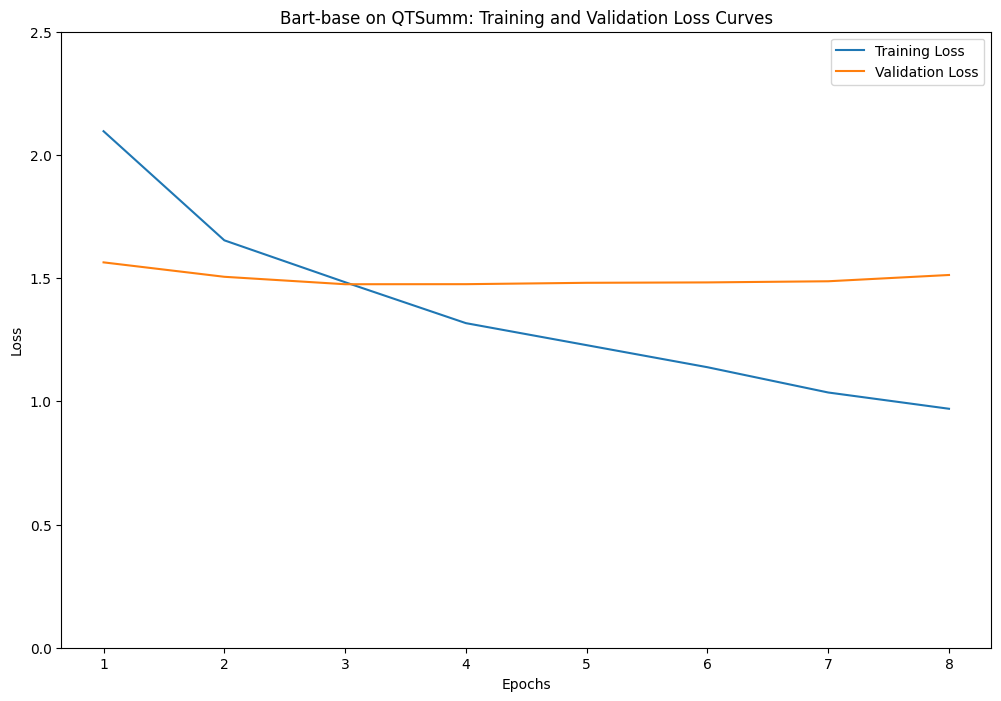

In [ ]:
import matplotlib.pyplot as plt

# Extract training and validation loss from the training history
train_loss = [item['loss'] for item in trainer.state.log_history if 'loss' in item]
eval_loss = [item['eval_loss'] for item in trainer.state.log_history if 'eval_loss' in item]

# Plot the learning curves
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training Loss')
plt.plot(eval_loss, label='Validation Loss')
plt.title('Bart-base on QTSumm: Training and Validation Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim((0,2.5))
plt.xticks([0,1,2,3,4,5,6,7],[1,2,3,4,5,6,7,8])
plt.legend()
plt.show()


In [ ]:
predictions=trainer.predict(test_data)
predictions[2]

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


{'test_loss': 1.554183840751648,
 'test_rouge_1': 0.326,
 'test_rouge_2': 0.207,
 'test_rouge_L': 0.278,
 'test_rouge_Lsum': 0.2783,
 'test_SacreBleu': 1.0302,
 'test_meteor': 0.1781,
 'test_gen_len': 20.0,
 'test_runtime': 34.079,
 'test_samples_per_second': 6.221,
 'test_steps_per_second': 1.555}

In [ ]:
trainer.save_model("Bart-base_QTSumm")

In [ ]:
fine_tuned_model = trainer.model

fine_tuned_model.push_to_hub("Bart-base_QTSumm_Filtered")
tokenizer.push_to_hub("Bart-base_QTSumm_Filtered")

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Depie/Bart-base_QTSumm_Filtered/commit/ab0112e900df6cd6e534ca582561d8823dbefffa', commit_message='Upload tokenizer', commit_description='', oid='ab0112e900df6cd6e534ca582561d8823dbefffa', pr_url=None, pr_revision=None, pr_num=None)

###Evaluation- **Filtered Data** - Focus on

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization", model="Depie/Bart-base_QTSumm_Filtered",tokenizer="Depie/Bart-base_QTSumm_Filtered",device=0)

config.json:   0%|          | 0.00/1.74k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/262 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/279 [00:00<?, ?B/s]

In [ ]:
summaries = {}
for i, text in enumerate(input_test['table to text'].head(3)):
        summaries[i] = summarizer(text,min_length=5,max_length=100)
        print(f"Table {i}\nGenerated Summary: {summaries[i][0]['summary_text']}\nAnotation: {input_test['summary'].iloc[i]}\n")


Table 0
Generated Summary: The game between Army Cadets and Stevens Tech took place on October 5th, and resulted in a 27-0 victory for the Cadets.
Anotation: The Army Cadets played Stevens Tech in the first game of their season on October 5th and won 27-0. This was a shutout win for the Cadets, as they were able to keep their opponents' score at zero while scoring 27 of their own points. Overall, it was a successful start to the 1912 season and they were able to gain momentum going into the next game against Rutgers.

Table 1
Generated Summary: The stages that had their finish line in Aurillac were in 2008, 1985, 1985 and 1985. In 2008, the first stage of the race was in Brioude and the second was Saint-Étienne. In 1985, the second stage was in Saint- Étienne and the third stage was Saint Saint-Etienne, where the leader at the summit was Eduardo Chozas.
Anotation: Aurillac has served as the finish line for 2 Pas De Peyrol stages between the years 1985 and 2008. In 1985, the 15th stage 

In [ ]:
from tqdm import tqdm
from transformers import AutoTokenizer
import gc
import torch

summaries_Bart = {}

for i, text in tqdm(enumerate(input_test['table to text']), total=len(input_test['table to text']), desc="Processing"):
  summaries_Bart[i] = summarizer(text,max_length=100,min_length=10,truncation=True)



In [ ]:
import pickle
# Save the dictionary as a pickle file
with open(f'summaries_Bart_QTSumm_Filt_Focus_on.pkl', 'wb') as file:
  pickle.dump(summaries_Bart , file)

In [ ]:
from tqdm import tqdm

Bart_bleu={}
Bart_rouge={}
Bart_meteor={}

for s in tqdm(summaries_Bart.keys()):
  preds = [summaries_Bart[s][0]['summary_text']]
  labels = [input_test['summary'].iloc[s]]
  #compute the scores
  score_r=rouge.compute(predictions=preds, references=labels, use_stemmer=True)
  score_b=bleu.compute(predictions=preds, references=labels)
  score_m=meteor.compute(predictions=preds, references=labels)
  #put them in a dict
  Bart_rouge[s]=score_r
  Bart_bleu[s]=score_b
  Bart_meteor[s]=score_m

In [ ]:
import statistics as st

sum_r1,sum_r2,sum_rL,sum_rLsum,sumbleu,sum_meteor=0,0,0,0,0,0
r1_list,r2_list,rL_list,rLsum_list,bleu_list,meteor_list=list(),list(),list(),list(),list(),list()

for key in Bart_rouge.keys():
  sum_r1+=Bart_rouge[key]['rouge1']
  sum_r2+=Bart_rouge[key]['rouge2']
  sum_rL+=Bart_rouge[key]['rougeL']
  sum_rLsum+=Bart_rouge[key]['rougeLsum']
  sumbleu+=Bart_bleu[key]['score']
  sum_meteor+=Bart_meteor[key]['meteor']

  r1_list.append(Bart_rouge[key]['rouge1'])
  r2_list.append(Bart_rouge[key]['rouge2'])
  rL_list.append(Bart_rouge[key]['rougeL'])
  rLsum_list.append(Bart_rouge[key]['rougeLsum'])
  bleu_list.append(Bart_bleu[key]['score'])
  meteor_list.append(Bart_meteor[key]['meteor'])

avg_r1=sum_r1/len(Bart_rouge.keys())
avg_r2=sum_r2/len(Bart_rouge.keys())
avg_rL=sum_rL/len(Bart_rouge.keys())
avg_rLsum=sum_rLsum/len(Bart_rouge.keys())
avg_bleu=sumbleu/len(Bart_bleu.keys())
avg_meteor=sum_meteor/len(Bart_meteor.keys())

print(f"""---------Bart-base-on-QTSumm-Filt--------\n
        Average
Rouge-1: {round(avg_r1,4)}
Rouge-2: {round(avg_r2,4)}
Rouge-L: {round(avg_rL,4)}
Rouge-Lsum: {round(avg_rLsum,4)}
SacreBleu: {round(avg_bleu,4)}
Meteor: {round(avg_meteor,4)}

        Median
Rouge-1: {round(st.median(r1_list),4)}
Rouge-2: {round(st.median(r2_list),4)}
Rouge-L: {round(st.median(rL_list),4)}
Rouge-Lsum: {round(st.median(rLsum_list),4)}
SacreBleu: {round(st.median(bleu_list),4)}
Meteor: {round(st.median(meteor_list),4)}

    Standard Deviation
Rouge-1: {round(st.stdev(r1_list),4)}
Rouge-2: {round(st.stdev(r2_list),4)}
Rouge-L: {round(st.stdev(rL_list),4)}
Rouge-Lsum: {round(st.stdev(rLsum_list),4)}
SacreBleu: {round(st.stdev(bleu_list),4)}
Meteor: {round(st.stdev(meteor_list),4)}

  Minimum/Maximum
Rouge-1 | Min: {round(min(r1_list),4)} | Max: {round(max(r1_list),4)}
Rouge-2 | Min: {round(min(r2_list),4)} | Max: {round(max(r2_list),4)}
Rouge-L | Min: {round(min(rL_list),4)} | Max: {round(max(rL_list),4)}
Rouge-Lsum | Min: {round(min(rLsum_list),4)} | Max: {round(max(rLsum_list),4)}
SacreBleu | Min: {round(min(bleu_list),4)} | Max: {round(max(bleu_list),4)}
Meteor| Min: {round(min(meteor_list),4)} | Max: {round(max(meteor_list),4)}

""")

---------Bart-base-on-QTSumm-Filt--------

        Average
Rouge-1: 0.5617
Rouge-2: 0.3075
Rouge-L: 0.42
Rouge-Lsum: 0.4201
SacreBleu: 17.8857
Meteor: 0.4159

        Median
Rouge-1: 0.5609
Rouge-2: 0.2955
Rouge-L: 0.4105
Rouge-Lsum: 0.4116
SacreBleu: 16.0858
Meteor: 0.4047

    Standard Deviation
Rouge-1: 0.1093
Rouge-2: 0.1201
Rouge-L: 0.1086
Rouge-Lsum: 0.1086
SacreBleu: 10.6279
Meteor: 0.133

  Minimum/Maximum
Rouge-1 | Min: 0.3158 | Max: 0.931
Rouge-2 | Min: 0.0938 | Max: 0.8214
Rouge-L | Min: 0.2154 | Max: 0.8966
Rouge-Lsum | Min: 0.2154 | Max: 0.8966
SacreBleu | Min: 2.3793 | Max: 72.4457
Meteor| Min: 0.1445 | Max: 0.9331




**What happens if we change the focus on part?**

In **Template 1**, we see that "Focus on" is: "Bronze, Marcelino Bolivar, 1984 Los Angeles, Boxing, Men 'S Light Flyweight, Bronze, Omar Catari, 1984 Los Angeles, Boxing, Men 'S Featherweight, Bronze, Rafael Vidal, 1984 Los Angeles, Swimming, Men 'S 200 M Butterfly"

What if we are intrested only in Athletics?
The "Focus on:" part then becomes just "Focus on: Athletics".

In the same way, in **Template 2** if we are intrested in the games between Denver Broncos and Oakland Raiders, the "Focus on:" part becomes from "Focus on: 7, October 20 , 2003, Kansas City Chiefs, L 17 - 10, Abc 6:00 Pm, 62391, 12, November 23 , 2003, Kansas City Chiefs, L 27 - 24, Cbs 1:15 Pm, 78889" to just "Focus on: Oakland Raiders, Denver Broncos".

**Template 1:**

In [ ]:
input_test['table to text'].iloc[102] #original template of text1

"Summarize the medals won by Venezuela at the 1984 Olympic Games in Los Angeles:  Table converted to text: Medal is Bronze, Name is Arnoldo Devonish, Games is 1952 Helsinki, Sport is Athletics, Event is Men 'S Triple Jump, Medal is Bronze, Name is Enrico Forcella, Games is 1960 Rome, Sport is Shooting, Event is Men 'S 50 Metre Rifle Prone, Medal is Gold, Name is Francisco Rodriguez, Games is 1968 Mexico City, Sport is Boxing, Event is Men 'S Light Flyweight, Medal is Silver, Name is Pedro Gamarro, Games is 1976 Montreal, Sport is Boxing, Event is Men 'S Welterweight, Medal is Silver, Name is Bernardo Piñango, Games is 1980 Moscow, Sport is Boxing, Event is Men 'S Bantamweight, Medal is Bronze, Name is Marcelino Bolivar, Games is 1984 Los Angeles, Sport is Boxing, Event is Men 'S Light Flyweight, Medal is Bronze, Name is Omar Catari, Games is 1984 Los Angeles, Sport is Boxing, Event is Men 'S Featherweight, Medal is Bronze, Name is Rafael Vidal, Games is 1984 Los Angeles, Sport is Swimm

**Template 2:**

In [ ]:
input_test['table to text'].iloc[163] #original template of text2

'Summarize the basic information of all the game(s) between Oakland Raiders and Kansas City Chiefs in 2003:  Table converted to text: Week is 1, Date is September 7 , 2003, Opponent is Tennessee Titans, Result is L 25 - 20, Tv Time is Espn 5:30 Pm, Attendance is 68809, Week is 2, Date is September 14 , 2003, Opponent is Cincinnati Bengals, Result is W 23 - 20, Tv Time is Cbs 1:15 Pm, Attendance is 50135, Week is 3, Date is September 22 , 2003, Opponent is Denver Broncos, Result is L 31 - 10, Tv Time is Abc 6:00 Pm, Attendance is 76753, Week is 4, Date is September 28 , 2003, Opponent is San Diego Chargers, Result is W 34 - 31 (Ot), Tv Time is Cbs 1:15 Pm, Attendance is 54078, Week is 5, Date is October 5 , 2003, Opponent is Chicago Bears, Result is L 24 - 21, Tv Time is Cbs 10:00 Am, Attendance is 61099, Week is 6, Date is October 12 , 2003, Opponent is Cleveland Browns, Result is L 13 - 7, Tv Time is Cbs 10:00 Am, Attendance is 73318, Week is 7, Date is October 20 , 2003, Opponent is 

We also changed the instruction to just "Summarize:" as the previous one would confuse the model.

In [ ]:
text1="Tell me about the medals of 1984: Table converted to text: Medal is Bronze, Name is Arnoldo Devonish, Games is 1952 Helsinki, Sport is Athletics, Event is Men 'S Triple Jump, Medal is Bronze, Name is Enrico Forcella, Games is 1960 Rome, Sport is Shooting, Event is Men 'S 50 Metre Rifle Prone, Medal is Gold, Name is Francisco Rodriguez, Games is 1968 Mexico City, Sport is Boxing, Event is Men 'S Light Flyweight, Medal is Silver, Name is Pedro Gamarro, Games is 1976 Montreal, Sport is Boxing, Event is Men 'S Welterweight, Medal is Silver, Name is Bernardo Piñango, Games is 1980 Moscow, Sport is Boxing, Event is Men 'S Bantamweight, Medal is Bronze, Name is Marcelino Bolivar, Games is 1984 Los Angeles, Sport is Boxing, Event is Men 'S Light Flyweight, Medal is Bronze, Name is Omar Catari, Games is 1984 Los Angeles, Sport is Boxing, Event is Men 'S Featherweight, Medal is Bronze, Name is Rafael Vidal, Games is 1984 Los Angeles, Sport is Swimming, Event is Men 'S 200 M Butterfly, Medal is Bronze, Name is Adriana Carmona, Games is 2004 Athens, Sport is Taekwondo, Event is Women + 67 Kg, Medal is Bronze, Name is Israel Jose Rubio, Games is 2004 Athens, Sport is Weightlifting, Event is Men 'S Featherweight, Medal is Bronze, Name is Dalia Contreras, Games is 2008 Beijing, Sport is Taekwondo, Event is Women 49 Kg, Medal is Gold, Name is Rubén Limardo, Games is 2012 London, Sport is Fencing, Event is Men 'S Épée, Table Structure: Number of rows: 12, Number of columns: 5"
text2="Tell me about Oakland Raiders vs Denver Broncos: Table converted to text: Week is 1, Date is September 7 , 2003, Opponent is Tennessee Titans, Result is L 25 - 20, Tv Time is Espn 5:30 Pm, Attendance is 68809, Week is 2, Date is September 14 , 2003, Opponent is Cincinnati Bengals, Result is W 23 - 20, Tv Time is Cbs 1:15 Pm, Attendance is 50135, Week is 3, Date is September 22 , 2003, Opponent is Denver Broncos, Result is L 31 - 10, Tv Time is Abc 6:00 Pm, Attendance is 76753, Week is 4, Date is September 28 , 2003, Opponent is San Diego Chargers, Result is W 34 - 31 (Ot), Tv Time is Cbs 1:15 Pm, Attendance is 54078, Week is 5, Date is October 5 , 2003, Opponent is Chicago Bears, Result is L 24 - 21, Tv Time is Cbs 10:00 Am, Attendance is 61099, Week is 6, Date is October 12 , 2003, Opponent is Cleveland Browns, Result is L 13 - 7, Tv Time is Cbs 10:00 Am, Attendance is 73318, Week is 7, Date is October 20 , 2003, Opponent is Kansas City Chiefs, Result is L 17 - 10, Tv Time is Abc 6:00 Pm, Attendance is 62391, Week is 9, Date is November 2 , 2003, Opponent is Detroit Lions, Result is L 23 - 13, Tv Time is Cbs 10:00 Am, Attendance is 61561, Week is 10, Date is November 9 , 2003, Opponent is New York Jets, Result is L 27 - 24, Tv Time is Cbs 1:15 Pm, Attendance is 51909, Week is 11, Date is November 16 , 2003, Opponent is Minnesota Vikings, Result is W 28 - 18, Tv Time is Fox 1:15 Pm, Attendance is 56653, Week is 12, Date is November 23 , 2003, Opponent is Kansas City Chiefs, Result is L 27 - 24, Tv Time is Cbs 1:15 Pm, Attendance is 78889, Week is 13, Date is November 30 , 2003, Opponent is Denver Broncos, Result is L 22 - 8, Tv Time is Cbs 1:15 Pm, Attendance is 57201, Week is 14, Date is December 7 , 2003, Opponent is Pittsburgh Steelers, Result is L 27 - 7, Tv Time is Cbs 10:00 Am, Attendance is 53079, Week is 15, Date is December 14 , 2003, Opponent is Baltimore Ravens, Result is W 20 - 12, Tv Time is Cbs 1:15 Pm, Attendance is 45398, Week is 16, Date is December 22 , 2003, Opponent is Green Bay Packers, Result is L 41 - 7, Tv Time is Abc 6:00 Pm, Attendance is 62298, Week is 17, Date is December 28 , 2003, Opponent is San Diego Chargers, Result is L 21 - 14, Tv Time is Cbs 1:15 Pm, Attendance is 62222, Table Structure: Number of rows: 16, Number of columns: 6"
texts=[text1,text2]

We notice that the output conveys the information included in the "Focus on:" part.

In [ ]:
summaries = {}
for i, text in zip(range(len(texts)),texts):
  summaries[i] = summarizer(text,min_length=5,max_length=100, do_sample=True, temperature= 0.7,top_p=0.95)
  print(f"Table {i}\nGenerated Summary: {summaries[i][0]['summary_text']}")


Table 0
Generated Summary: In 1984, the Olympic Games were held in Los Angeles. The event was Men's Light Flyweight, and the medal was awarded to Dalia Contreras.
Table 1
Generated Summary: The Oakland Raiders faced the Denver Broncos twice during the 2003 season. In Week 1, the Raiders won 27-8 with a score of 22-8. The attendance for this game was 62298.


##T5-base

###Training

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("t5-base")

In [ ]:
#Turning dataframes into HF objects
from datasets import Dataset

train = Dataset.from_pandas(input_train)
valid = Dataset.from_pandas(input_validation)
test = Dataset.from_pandas(input_test)

In [ ]:
#applying the preprocessing function to each subset
tokenized_train = train.map(preprocess_function, batched=True)
tokenized_valid = valid.map(preprocess_function, batched=True)
tokenized_test = test.map(preprocess_function, batched=True)

Map:   0%|          | 0/4981 [00:00<?, ? examples/s]

Map:   0%|          | 0/1052 [00:00<?, ? examples/s]

Map:   0%|          | 0/1078 [00:00<?, ? examples/s]

In [ ]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model="t5-base")

In [ ]:
from transformers import AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer,EarlyStoppingCallback

In [ ]:
model = AutoModelForSeq2SeqLM.from_pretrained("t5-base")

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
early_stopping = EarlyStoppingCallback(early_stopping_patience=5, early_stopping_threshold=0.01)

In [ ]:
def optuna_hp_space(trial):
    return {
        "learning_rate": trial.suggest_categorical("learning_rate", [2e-5, 2e-4, 2e-6]) ,
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [8,16,32]),
    }

In [ ]:
def model_init(trial):
    return  AutoModelForSeq2SeqLM.from_pretrained("t5-base")


In [ ]:
training_args = Seq2SeqTrainingArguments(
    output_dir="my_fine_tuned_t5_base_model",
    evaluation_strategy="epoch",
    save_strategy= "epoch",
    learning_rate=2e-6,
    metric_for_best_model = 'eval_loss',
    weight_decay=0.1,
    num_train_epochs=1,
    predict_with_generate=True,
    fp16=False,
    load_best_model_at_end=True,
    auto_find_batch_size=True

)

In [ ]:
trainer = Seq2SeqTrainer(
    model=None,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_valid,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
    model_init=model_init,
    data_collator=data_collator,
    callbacks=[early_stopping]
)

In [ ]:
!pip install optuna -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.7 MB/s eta 0:00:00


In [ ]:
def my_objective(metrics):
    eval_loss = metrics["eval_loss"]
    return eval_loss

In [ ]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
from optuna.samplers import TPESampler
from optuna.pruners import HyperbandPruner

torch.autograd.set_detect_anomaly(True)

best_trial = trainer.hyperparameter_search(
    direction="minimize",
    sampler=TPESampler(),
    pruner=HyperbandPruner(),
    backend="optuna",
    hp_space=optuna_hp_space,
    n_trials=3,
    compute_objective=my_objective,
)

In [ ]:
best_params=best_trial.hyperparameters

In [ ]:
print(best_trial)

import pickle
# Save to a pickle file
with open('best_params.pkl', 'wb') as pickle_file:
    pickle.dump(best_params, pickle_file)

**Training**

In [ ]:
best_params={'learning_rate': 2e-06, 'per_device_train_batch_size': 4}

In [ ]:
training_args = Seq2SeqTrainingArguments(
    output_dir="my_fine_tuned_t5_small_model",
    evaluation_strategy="epoch",
    save_strategy= "epoch",
    learning_rate=best_params['learning_rate'],
    per_device_train_batch_size=best_params['per_device_train_batch_size'],
    metric_for_best_model = 'eval_loss',
    weight_decay=0.1,
    num_train_epochs=2,
    predict_with_generate=True,
    fp16=False,
    load_best_model_at_end=True,

)

In [ ]:
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_valid,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping],
)

In [ ]:
import gc
import torch
torch.cuda.empty_cache()
gc.collect()

495

In [ ]:
torch.autograd.set_detect_anomaly(True)
trainer.train()

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,Rouge 1,Rouge 2,Rouge L,Rouge Lsum,Sacrebleu,Meteor,Gen Len
1,2.707200,2.202614,0.252100,0.133200,0.207500,0.207400,0.475100,0.140300,18.808900
2,2.291300,2.122599,0.272300,0.146600,0.223800,0.223800,0.585400,0.150600,18.964800


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


TrainOutput(global_step=2492, training_loss=2.7065420380373446, metrics={'train_runtime': 3764.5454, 'train_samples_per_second': 2.646, 'train_steps_per_second': 0.662, 'total_flos': 1.316789728556544e+16, 'train_loss': 2.7065420380373446, 'epoch': 2.0})

In [ ]:
trainer.save_model("my_fine_tuned_t5_small_model")

In [ ]:
fine_tuned_model = trainer.model
fine_tuned_model.push_to_hub("fine_tuned_t5-base_on_QTSumm_Focus_on_Unfiltered")
tokenizer.push_to_hub("fine_tuned_t5-base_on_QTSumm_Focus_on_Unfiltered")


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Depie/fine_tuned_t5-base_on_QTSumm_Focus_on_Unfiltered/commit/37ba7bccf1792df153730b5eb80d39b6b45af150', commit_message='Upload tokenizer', commit_description='', oid='37ba7bccf1792df153730b5eb80d39b6b45af150', pr_url=None, pr_revision=None, pr_num=None)

###**Evaluation**

In [ ]:
from transformers import pipeline
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("t5-base")
model = AutoModelForSeq2SeqLM.from_pretrained("Depie/fine_tuned_t5-base_on_QTSumm_Focus_on_Unfiltered").to("cuda")
summarizer = pipeline("summarization", model=model,tokenizer=tokenizer,device='cuda')

In [ ]:
summaries = {}
for i, text in enumerate(input_test['table to text'].head(3)):
        text = "summarize: " + text
        summaries[i] = summarizer(text,min_length=1,max_length=150)
        print(f"Table {i}\nGenerated Summary: {summaries[i][0]['summary_text']}\nAnotation: {input_test['summary'].iloc[i]}\n")


Token indices sequence length is longer than the specified maximum sequence length for this model (756 > 512). Running this sequence through the model will result in indexing errors


Table 0
Generated Summary: who are the Catholic justices who were appointed by a President Bush and what states are they from?
Anotation: John Roberts from Maryland and Samuel Alito from New Zersey   were appointed by a President Bush.

Table 1
Generated Summary: Army Cadets play Stevens Tech in a game on Oct 5 . the game was won by the army, with a score of 27 points and a draw of 1 - 0. The result was a win for the army cadets .
Anotation: The Army Cadets played Stevens Tech in the first game of their season on October 5th and won 27-0. This was a shutout win for the Cadets, as they were able to keep their opponents' score at zero while scoring 27 of their own points. Overall, it was a successful start to the 1912 season and they were able to gain momentum going into the next game against Rutgers.

Table 2
Generated Summary: HP LaserJet 4000 series has two models: 4200 and 4250 . each has a speed of 460 MHz and a print speed of 40 Mbps . both models have similar specifications, with 

In [ ]:
from tqdm import tqdm
from transformers import AutoTokenizer
import gc
import torch

gc.collect()
torch.cuda.empty_cache()

summaries_T5_base = {}

for i, text in tqdm(enumerate(input_test['table to text']), total=len(input_test['table to text']), desc="Processing"):
    text = "summarize: " + text
    summaries_T5_base[i] = summarizer(text,max_length=150,min_length=1)


Processing:   1%|          | 10/1078 [00:12<24:48,  1.39s/it]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
Processing: 100%|██████████| 1078/1078 [27:06<00:00,  1.51s/it]


In [ ]:
import pickle
# Save the dictionary as a pickle file
with open(f'summaries_T5-base_QTSumm.pkl', 'wb') as file:
  pickle.dump(summaries_T5_base , file)

In [ ]:
from tqdm import tqdm

T5_base_bleu={}
T5_base_rouge={}
T5_base_meteor={}

for s in tqdm(summaries_T5_base.keys()):
  preds = [summaries_T5_base[s][0]['summary_text']]
  labels = [input_test['summary'].iloc[s]]
  #compute the scores
  score_r=rouge.compute(predictions=preds, references=labels, use_stemmer=True)
  score_b=bleu.compute(predictions=preds, references=labels)
  score_m=meteor.compute(predictions=preds, references=labels)
  #put them in a dict
  T5_base_rouge[s]=score_r
  T5_base_bleu[s]=score_b
  T5_base_meteor[s]=score_m

100%|██████████| 1078/1078 [02:58<00:00,  6.05it/s]


In [ ]:
import statistics as st

sum_r1,sum_r2,sum_rL,sum_rLsum,sumbleu,sum_meteor=0,0,0,0,0,0
r1_list,r2_list,rL_list,rLsum_list,bleu_list,meteor_list=list(),list(),list(),list(),list(),list()

for key in T5_base_rouge.keys():
  sum_r1+=T5_base_rouge[key]['rouge1']
  sum_r2+=T5_base_rouge[key]['rouge2']
  sum_rL+=T5_base_rouge[key]['rougeL']
  sum_rLsum+=T5_base_rouge[key]['rougeLsum']
  sumbleu+=T5_base_bleu[key]['score']
  sum_meteor+=T5_base_meteor[key]['meteor']

  r1_list.append(T5_base_rouge[key]['rouge1'])
  r2_list.append(T5_base_rouge[key]['rouge2'])
  rL_list.append(T5_base_rouge[key]['rougeL'])
  rLsum_list.append(T5_base_rouge[key]['rougeLsum'])
  bleu_list.append(T5_base_bleu[key]['score'])
  meteor_list.append(T5_base_meteor[key]['meteor'])

avg_r1=sum_r1/len(T5_base_rouge.keys())
avg_r2=sum_r2/len(T5_base_rouge.keys())
avg_rL=sum_rL/len(T5_base_rouge.keys())
avg_rLsum=sum_rLsum/len(T5_base_rouge.keys())
avg_bleu=sumbleu/len(T5_base_bleu.keys())
avg_meteor=sum_meteor/len(T5_base_meteor.keys())

print(f"""-----T5-base-on-QTSumm-Unfiltered-with-Focus on--------\n

        Average
Rouge-1: {round(avg_r1,4)}
Rouge-2: {round(avg_r2,4)}
Rouge-L: {round(avg_rL,4)}
Rouge-Lsum: {round(avg_rLsum,4)}
SacreBleu: {round(avg_bleu,4)}
Meteor: {round(avg_meteor,4)}

        Median
Rouge-1: {round(st.median(r1_list),4)}
Rouge-2: {round(st.median(r2_list),4)}
Rouge-L: {round(st.median(rL_list),4)}
Rouge-Lsum: {round(st.median(rLsum_list),4)}
SacreBleu: {round(st.median(bleu_list),4)}
Meteor: {round(st.median(meteor_list),4)}

    Standard Deviation
Rouge-1: {round(st.stdev(r1_list),4)}
Rouge-2: {round(st.stdev(r2_list),4)}
Rouge-L: {round(st.stdev(rL_list),4)}
Rouge-Lsum: {round(st.stdev(rLsum_list),4)}
SacreBleu: {round(st.stdev(bleu_list),4)}
Meteor: {round(st.stdev(meteor_list),4)}

  Minimum/Maximum
Rouge-1 | Min: {round(min(r1_list),4)} | Max: {round(max(r1_list),4)}
Rouge-2 | Min: {round(min(r2_list),4)} | Max: {round(max(r2_list),4)}
Rouge-L | Min: {round(min(rL_list),4)} | Max: {round(max(rL_list),4)}
Rouge-Lsum | Min: {round(min(rLsum_list),4)} | Max: {round(max(rLsum_list),4)}
SacreBleu | Min: {round(min(bleu_list),4)} | Max: {round(max(bleu_list),4)}
Meteor| Min: {round(min(meteor_list),4)} | Max: {round(max(meteor_list),4)}

""")

-----T5-base-on-QTSumm-Unfiltered-with-Focus on--------


        Average
Rouge-1: 0.4358
Rouge-2: 0.2144
Rouge-L: 0.3164
Rouge-Lsum: 0.3165
SacreBleu: 10.2954
Meteor: 0.3281

        Median
Rouge-1: 0.4348
Rouge-2: 0.2035
Rouge-L: 0.306
Rouge-Lsum: 0.3061
SacreBleu: 7.9374
Meteor: 0.3059

    Standard Deviation
Rouge-1: 0.1189
Rouge-2: 0.109
Rouge-L: 0.107
Rouge-Lsum: 0.107
SacreBleu: 8.4059
Meteor: 0.14

  Minimum/Maximum
Rouge-1 | Min: 0.0 | Max: 0.8462
Rouge-2 | Min: 0.0 | Max: 0.75
Rouge-L | Min: 0.0 | Max: 0.8462
Rouge-Lsum | Min: 0.0 | Max: 0.8462
SacreBleu | Min: 0.0 | Max: 69.3098
Meteor| Min: 0.0 | Max: 0.8452




In [ ]:
#put all averages in a dictionary
T5_base_All_avg_all_qt={'Rouge1':0.4358,'Rouge2':0.2144,'Rouge-L':0.3164,'Rouge-Lsum':0.3165,"SacreBleu":10.2954,"Meteor":0.3281}
#put all median values in a dictionary
T5_base_All_median_all_qt={'Rouge1':0.4348,'Rouge2':0.2035,'Rouge-L':0.306,'Rouge-Lsum': 0.3061,"SacreBleu": 7.9374,"Meteor":0.3059}
#put all standard deviation values in a dictionary
T5_base_All_sd_all_qt={'Rouge1':0.1189,'Rouge2': 0.109,'Rouge-L':0.107,'Rouge-Lsum':0.107,"SacreBleu":8.4059,"Meteor":0.14}

#Comparison

In [ ]:
import pandas as pd
print('------------All-Test-set-Average---------------')
avg_dataframe=pd.DataFrame(T5_base_All_avg_all_qt.keys(),index=range(len(T5_base_All_avg_all_qt.keys())),columns=['Metric'])
avg_dataframe['T5-small']=T5_All_avg_all_qt.values()
avg_dataframe['T5-base']=T5_base_All_avg_all_qt.values()
avg_dataframe['Bart-base']=Bart_All_avg_all_qt.values()
avg_dataframe

------------All-Test-set-Average---------------


,Metric,T5-small,T5-base,Bart-base
0,Rouge1,0.5214,0.4358,0.5153
1,Rouge2,0.2856,0.2144,0.2783
2,Rouge-L,0.3984,0.3164,0.3951
3,Rouge-Lsum,0.3983,0.3165,0.3951
4,SacreBleu,16.1109,10.2954,16.2992
5,Meteor,0.3980,0.3281,0.4000


In [ ]:
import pandas as pd
print('------------All-Test-set-Median---------------')
median_dataframe=pd.DataFrame(T5_base_All_median_all_qt.keys(),index=range(len(T5_base_All_median_all_qt.keys())),columns=['Metric'])
median_dataframe['T5-small']=T5_All_median_all_qt.values()
median_dataframe['T5-base']=T5_base_All_median_all_qt.values()
median_dataframe['Bart-base']=Bart_All_median_all_qt.values()
median_dataframe

------------All-Test-set-Median---------------


,Metric,T5-small,T5-base,Bart-base
0,Rouge1,0.5245,0.4348,0.5127
1,Rouge2,0.2716,0.2035,0.2621
2,Rouge-L,0.3846,0.3060,0.3739
3,Rouge-Lsum,0.3846,0.3061,0.3750
4,SacreBleu,13.5828,7.9374,13.9352
5,Meteor,0.3764,0.3059,0.3801


In [ ]:
print('-------All-Test-set-Standard Deviation-------')
sd_dataframe=pd.DataFrame(T5_base_All_sd_all_qt.keys(),index=range(len(T5_base_All_sd_all_qt.keys())),columns=['Metric'])
sd_dataframe['T5-small']=T5_All_sd_all_qt.values()
sd_dataframe['T5-base']=T5_base_All_sd_all_qt.values()
sd_dataframe['Bart-base']=Bart_All_sd_all_qt.values()
sd_dataframe

-------All-Test-set-Standard Deviation-------


,Metric,T5-small,T5-base,Bart-base
0,Rouge1,0.1341,0.1189,0.1376
1,Rouge2,0.1360,0.1090,0.1387
2,Rouge-L,0.1374,0.1070,0.1375
3,Rouge-Lsum,0.1374,0.1070,0.1375
4,SacreBleu,11.3419,8.4059,11.5794
5,Meteor,0.1479,0.1400,0.1512


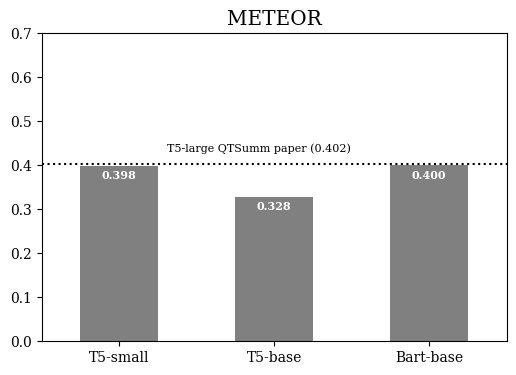

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

#Customize
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
fig, ax = plt.subplots(figsize=(6, 4))

bars = avg_dataframe.T[5].tail(3).plot(kind='bar', color='gray', ax=ax)
plt.axhline(y=0.402, color='black', linestyle='dotted', label='T5-large QTSumm paper', xmax=1)
plt.text(0.9, 0.43, 'T5-large QTSumm paper (0.402)', color='black', fontsize=8, ha='center')

# Add labels inside the bars
for bar in bars.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.03,
            f'{bar.get_height():.3f}', color='white', ha='center', fontsize=8,weight='bold')

plt.xticks(rotation=0)
plt.ylim(top=0.7)
plt.title('METEOR')
plt.show()

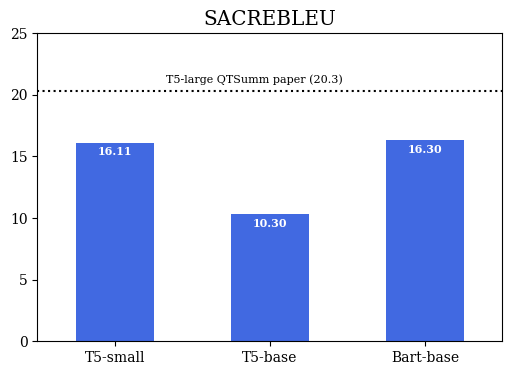

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

#Customize
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
fig, ax = plt.subplots(figsize=(6, 4))

bars = avg_dataframe.T[4].tail(3).plot(kind='bar', color='royalblue', ax=ax)
plt.axhline(y=20.3, color='black', linestyle='dotted', label='T5-large QTSumm paper', xmax=1)
plt.text(0.9, 21, 'T5-large QTSumm paper (20.3)', color='black', fontsize=8, ha='center')

# Add labels inside the bars
for bar in bars.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 1,
            f'{bar.get_height():.2f}', color='white', ha='center', fontsize=8,weight='bold')

plt.xticks(rotation=0)
plt.ylim(top=25)
plt.title('SACREBLEU')
plt.show()

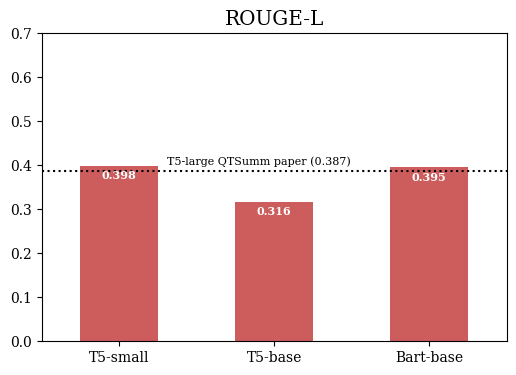

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

#Customize
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
fig, ax = plt.subplots(figsize=(6, 4))

bars = avg_dataframe.T[2].tail(3).plot(kind='bar', color='indianred', ax=ax)
plt.axhline(y=0.387, color='black', linestyle='dotted', label='T5-large QTSumm paper', xmax=1)
plt.text(0.9, 0.4, 'T5-large QTSumm paper (0.387)', color='black', fontsize=8, ha='center')

# Add labels inside the bars
for bar in bars.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.03,
            f'{bar.get_height():.3f}', color='white', ha='center', fontsize=8,weight='bold')

plt.xticks(rotation=0)
plt.ylim(top=0.7)
plt.title('ROUGE-L')
plt.show()

In [ ]:
import pickle

with open('/content/summaries_T5_QTSumm.pkl', 'rb') as file:
    t5_small_summaries = pickle.load(file)


with open('/content/summaries_Bart_QTSumm_Unfiltered_focus_on.pkl', 'rb') as file:
    bart_base_summaries = pickle.load(file)

with open('/content/summaries_T5-base_QTSumm.pkl', 'rb') as file:
    t5_base_summaries = pickle.load(file)


In [ ]:
from tqdm import tqdm

T5_small_bleu={}
T5_small_rouge={}
T5_small_meteor={}

T5_base_bleu={}
T5_base_rouge={}
T5_base_meteor={}

Bart_base_bleu={}
Bart_base_rouge={}
Bart_base_meteor={}

model_sum_list=[t5_small_summaries, t5_base_summaries, bart_base_summaries]
for model_sum in model_sum_list:
  for s in tqdm(model_sum.keys()):
    preds = [ model_sum[s]]
    labels = [input_test['summary'].iloc[s]]
    #compute the scores
    score_r=rouge.compute(predictions=preds, references=labels, use_stemmer=True)
    score_b=bleu.compute(predictions=preds, references=labels)
    score_m=meteor.compute(predictions=preds, references=labels)
    if model_sum == t5_small_summaries:
      #put them in a dict
      T5_small_rouge[s]=score_r
      T5_small_bleu[s]=score_b
      T5_small_meteor[s]=score_m
    elif model_sum == t5_base_summaries:
      T5_base_rouge[s]=score_r
      T5_base_bleu[s]=score_b
      T5_base_meteor[s]=score_m
    else:
      Bart_base_rouge[s]=score_r
      Bart_base_bleu[s]=score_b
      Bart_base_meteor[s]=score_m

100%|██████████| 1078/1078 [04:01<00:00,  4.46it/s]


In [ ]:
T5_small_bleu_score=[]
T5_base_bleu_score=[]
Bart_base_bleu_score=[]

for i,j,p in zip(T5_small_bleu.keys(),T5_base_bleu.keys(),Bart_base_bleu.keys()):
 T5_small_bleu_score.append(T5_small_bleu[i]['score'])
 T5_base_bleu_score.append(T5_base_bleu[j]['score'])
 Bart_base_bleu_score.append(Bart_base_bleu[p]['score'])

print("--------------SACREBLEU---------------")
bleu_df=pd.DataFrame(T5_small_bleu_score,columns=['T5-small'])
bleu_df['T5-base']=T5_base_bleu_score
bleu_df['Bart-base']=Bart_base_bleu_score
bleu_df

--------------SACREBLEU---------------


,T5-small,T5-base,Bart-base
0,23.751179,26.801652,18.016249
1,10.919244,4.995128,6.375261
2,11.143019,3.230929,5.157036
3,6.702130,6.897644,7.964488
4,47.434733,9.716891,46.295395
...,...,...,...
1073,11.286207,18.008836,24.855639
1074,20.751553,23.646756,28.886555
1075,25.008373,20.567765,13.350469
1076,6.627576,3.901809,5.479942


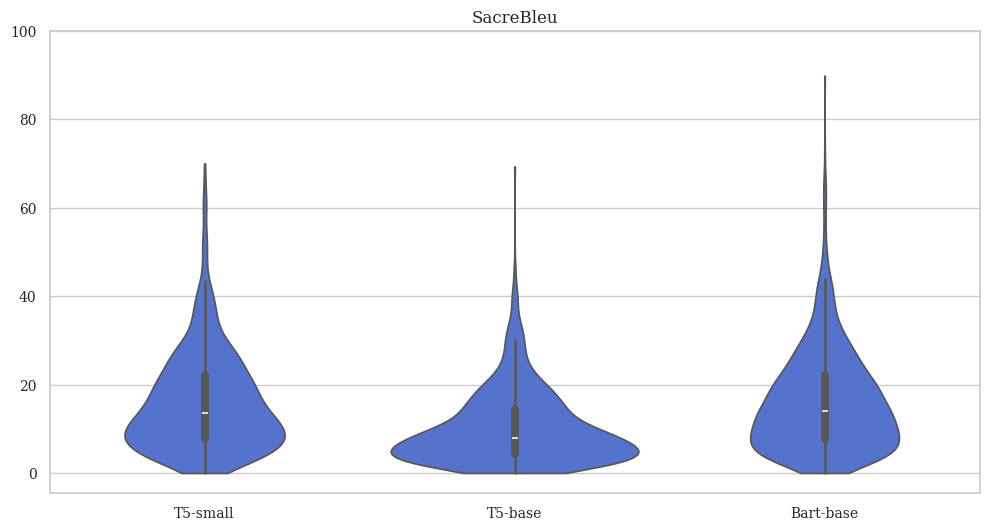

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

df_melted = pd.melt(bleu_df, var_name='Model', value_name='SACREBLEU')

#Customize
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

plt.figure(figsize=(12, 6))
sns.violinplot(x="Model", y="SACREBLEU", data=df_melted, color="royalblue",cut=0)
plt.title("SacreBleu")
plt.ylim(top=100)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [ ]:
T5_small_meteor_score=[]
T5_base_meteor_score=[]
Bart_base_meteor_score=[]

for i,j,p in zip(T5_small_meteor.keys(),T5_base_meteor.keys(),Bart_base_meteor.keys()):
 T5_small_meteor_score.append(T5_small_meteor[i]['meteor'])
 T5_base_meteor_score.append(T5_base_meteor[j]['meteor'])
 Bart_base_meteor_score.append(Bart_base_meteor[p]['meteor'])

print("--------------Meteor---------------")
meteor_df=pd.DataFrame(T5_small_meteor_score,columns=['T5-small'])
meteor_df['T5-base']=T5_base_meteor_score
meteor_df['Bart-base']=Bart_base_meteor_score
meteor_df

--------------Meteor---------------


,T5-small,T5-base,Bart-base
0,0.640863,0.452852,0.704893
1,0.276057,0.325702,0.241580
2,0.264525,0.171252,0.180840
3,0.376791,0.365143,0.470613
4,0.730819,0.405672,0.710485
...,...,...,...
1073,0.428305,0.542144,0.540782
1074,0.675677,0.593891,0.692430
1075,0.509751,0.626698,0.442062
1076,0.321214,0.267017,0.363625


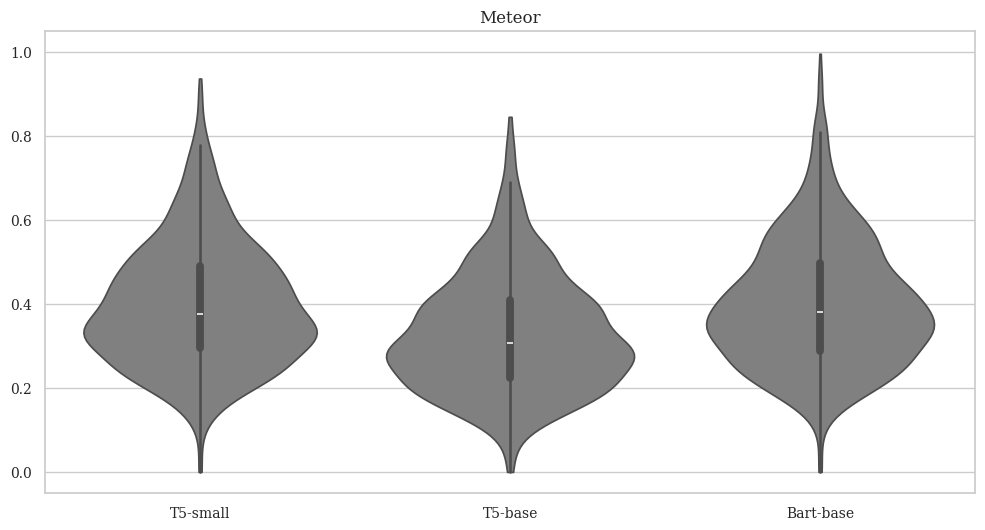

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

df_melted1 = pd.melt(meteor_df, var_name='Model', value_name='METEOR')

#Customize
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

plt.figure(figsize=(12, 6))
sns.violinplot(x="Model", y="METEOR", data=df_melted1, color="gray",cut=0)
plt.title("Meteor")
plt.ylim(top=1.05)
plt.xlabel('')
plt.ylabel('')


plt.show()

In [ ]:
rouge_df_t5_small=pd.DataFrame(T5_small_rouge.values())
rouge_df_t5_small['Model']='T5_small'

rouge_df_t5_base=pd.DataFrame(T5_base_rouge.values())
rouge_df_t5_base['Model']='T5_base'

rouge_df_Bart_base=pd.DataFrame(Bart_base_rouge.values())
rouge_df_Bart_base['Model']='Bart_base'

rouge_df = pd.concat([rouge_df_t5_small, rouge_df_t5_base,rouge_df_Bart_base], ignore_index=True)
print("-------------------------ROUGE-------------------------")
rouge_df



-------------------------ROUGE-------------------------


,rouge1,rouge2,rougeL,rougeLsum,Model
0,0.545455,0.415094,0.509091,0.509091,T5_small
1,0.495238,0.213592,0.361905,0.361905,T5_small
2,0.465116,0.235294,0.220930,0.220930,T5_small
3,0.528736,0.282353,0.436782,0.436782,T5_small
4,0.739726,0.619718,0.739726,0.739726,T5_small
...,...,...,...,...,...
3229,0.620690,0.428571,0.620690,0.620690,Bart_base
3230,0.597701,0.447059,0.597701,0.597701,Bart_base
3231,0.632911,0.311688,0.379747,0.379747,Bart_base
3232,0.378788,0.153846,0.272727,0.272727,Bart_base


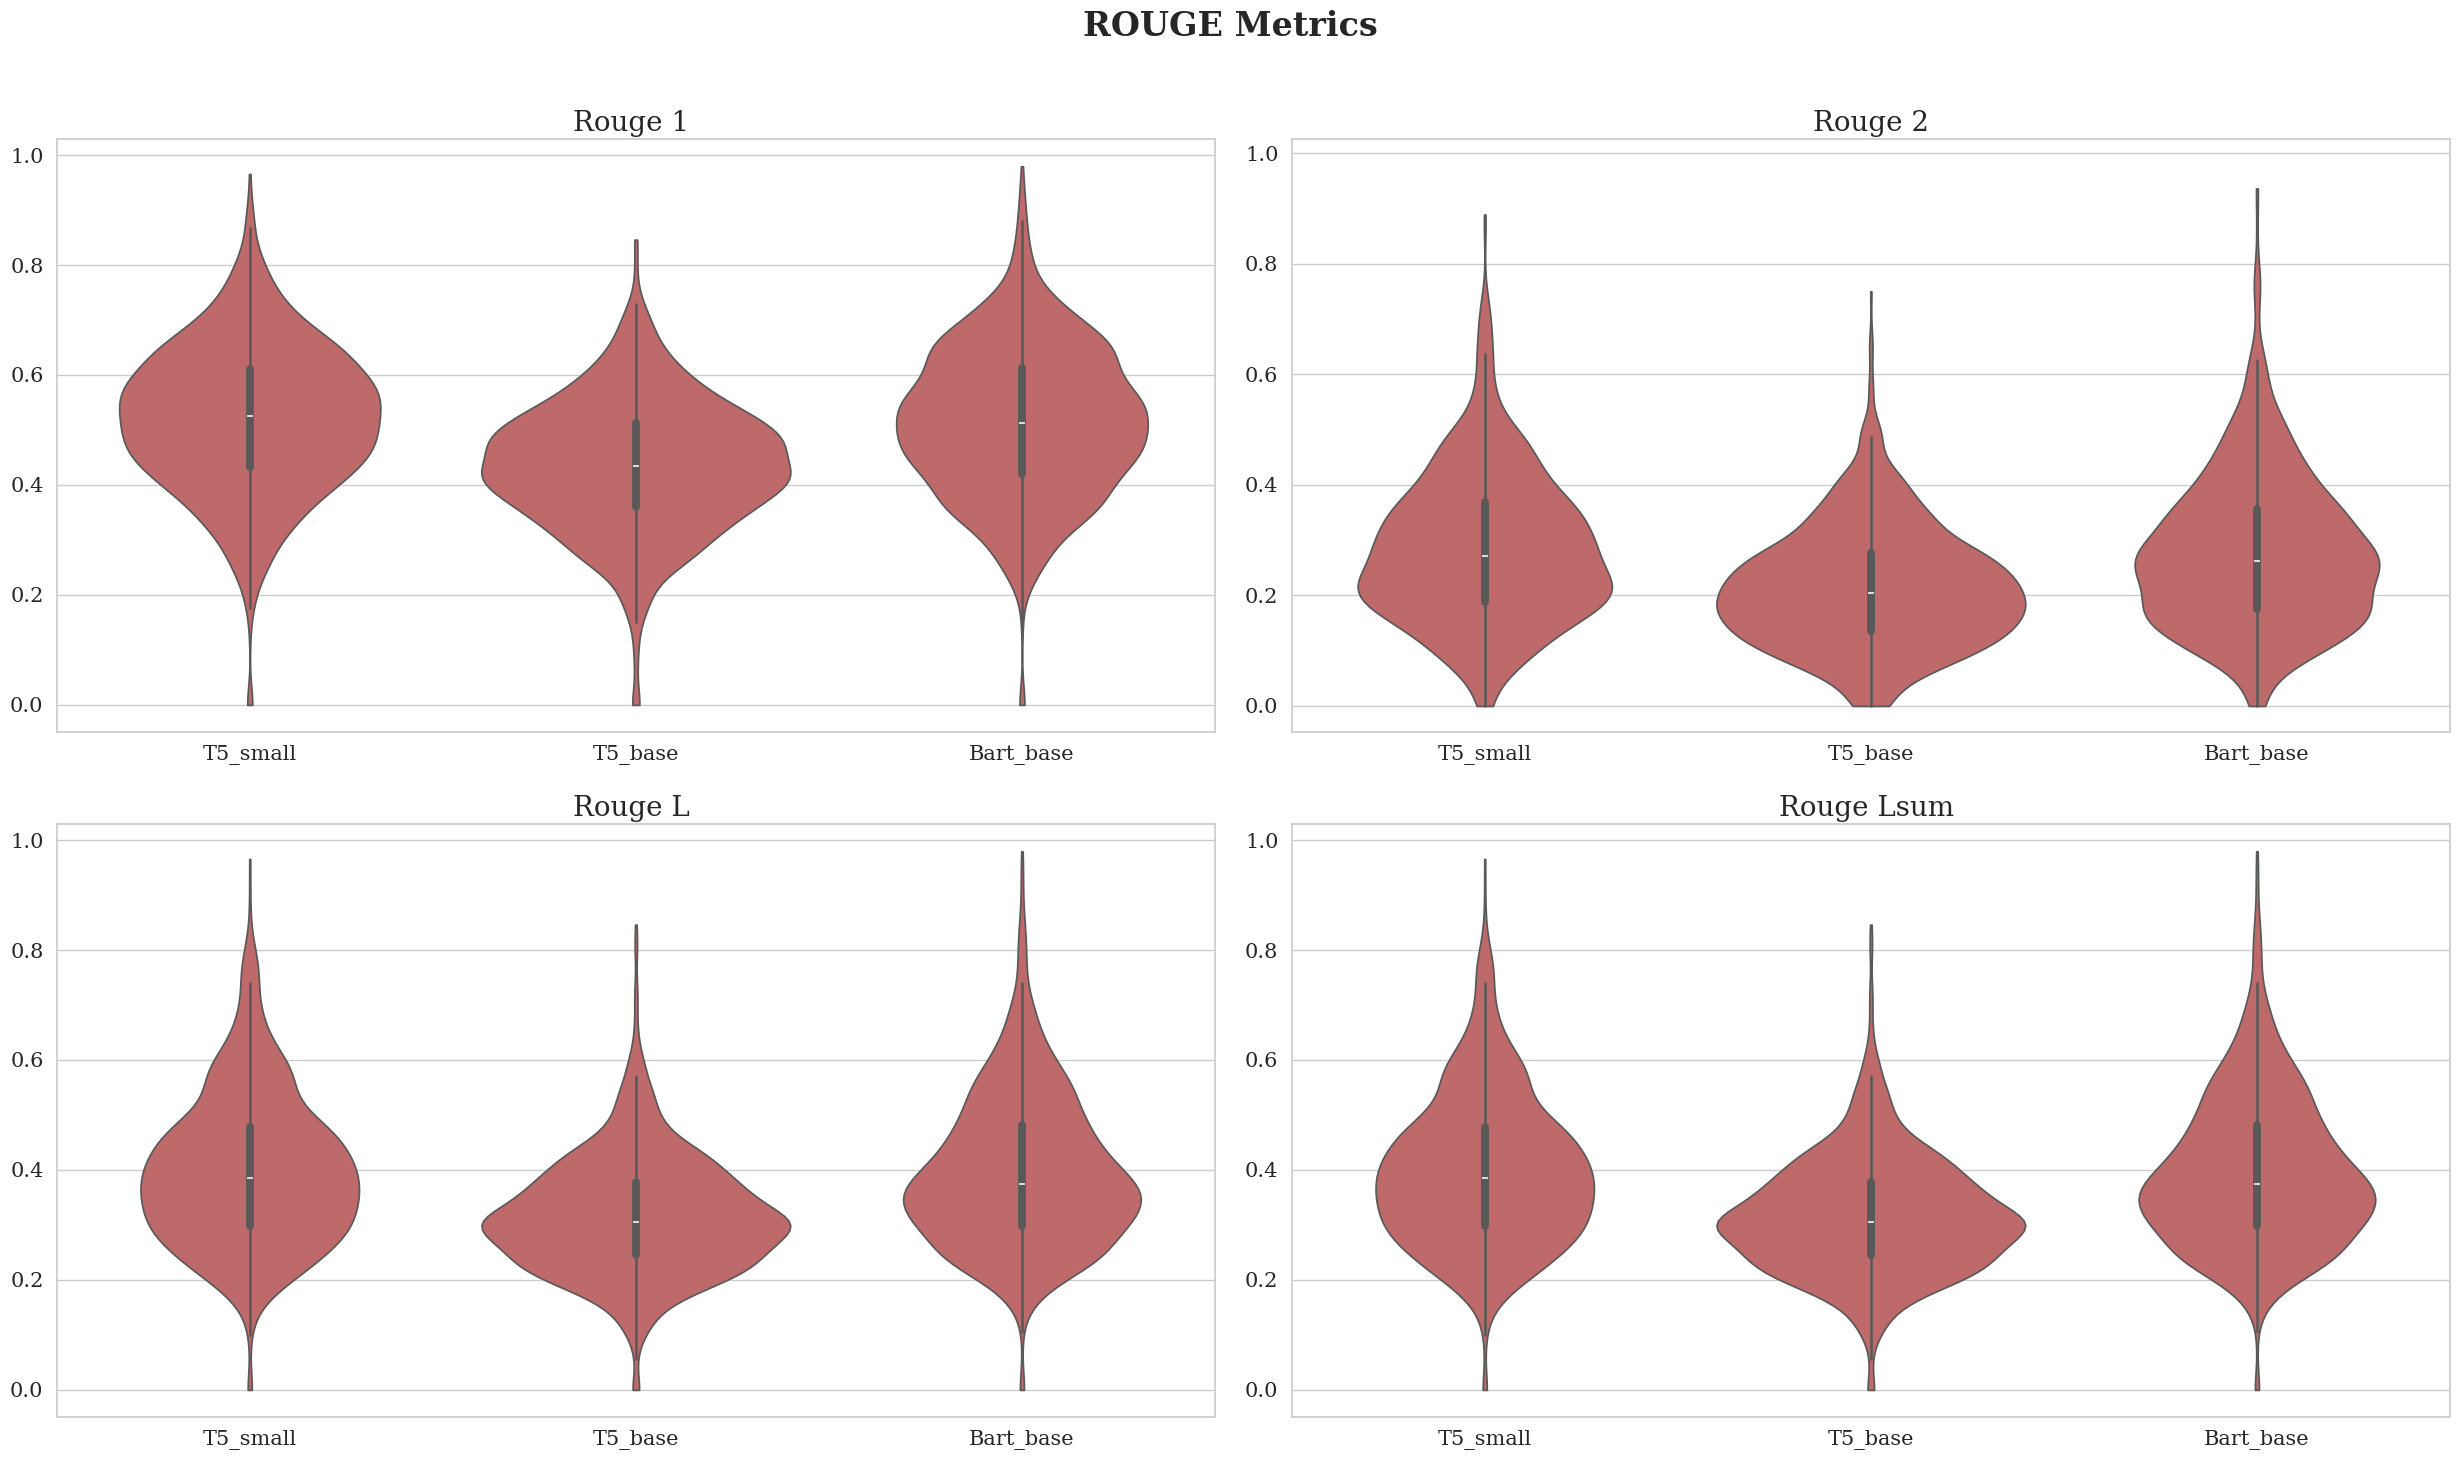

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set the global style for the plots
sns.set(style="whitegrid")

# Set the font properties
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 20
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15

# Create a trellis plot with two violinplots
plt.figure(figsize=(25, 14))

# Plot for Rouge1
plt.subplot(2, 2, 1)
sns.violinplot(x="Model", y="rouge1", data=rouge_df , color="indianred",cut=0)
plt.title("Rouge 1 ",size=20)
plt.xlabel('')
plt.ylabel('')

# Plot for Rouge2
plt.subplot(2, 2, 2)
sns.violinplot(x="Model", y="rouge2", data=rouge_df , color="indianred",cut=0)
plt.title("Rouge 2",size=20)
plt.ylim(top=1.025)
plt.xlabel('')
plt.ylabel('')

# Plot for RougeL
plt.subplot(2, 2, 3)
sns.violinplot(x="Model", y="rougeL", data=rouge_df , color="indianred",cut=0)
plt.title("Rouge L ",size=20)
plt.xlabel('')
plt.ylabel('')

# Plot for RougeLsum
plt.subplot(2, 2, 4)
sns.violinplot(x="Model", y="rougeLsum", data=rouge_df , color="indianred",cut=0)
plt.title("Rouge Lsum ",size=20)
plt.xlabel('')
plt.ylabel('')

# Adjust layout
plt.tight_layout()

plt.suptitle('ROUGE Metrics', y=1.05, weight='bold')
# Show the plot
plt.show()


Convert dataframes to latex

In [ ]:

latex_table = avg_dataframe.to_latex(
    index=False,  # To not include the DataFrame index as a column in the table
    caption="Results: Average",  # The caption to appear above the table in the LaTeX document
    label="tab:model_comparison_avg",  # A label used for referencing the table within the LaTeX document
    position="htbp",  # The preferred positions where the table should be placed in the document ('here', 'top', 'bottom', 'page')
    column_format="|l|l|l|l|",  # The format of the columns: left-aligned with vertical lines between them
    escape=False,  # Disable escaping LaTeX special characters in the DataFrame
    float_format="{:0.4f}".format  # Formats floats to two decimal places
)

print(latex_table)

\begin{table}[htbp]
\centering
\caption{Results: Average}
\label{tab:model_comparison}
\begin{tabular}{|l|l|l|l|}
\toprule
    Metric &  T5-small &  T5-base &  Bart-base \\
\midrule
    Rouge1 &    0.5123 &   0.4402 &     0.5145 \\
    Rouge2 &    0.2726 &   0.2126 &     0.2778 \\
   Rouge-L &    0.3812 &   0.3151 &     0.3947 \\
Rouge-Lsum &    0.3812 &   0.3152 &     0.3948 \\
 SacreBleu &   15.7103 &  10.4884 &    16.2123 \\
    Meteor &    0.4020 &   0.3391 &     0.3968 \\
\bottomrule
\end{tabular}
\end{table}



<ipython-input-46-e0a636278d5c>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = avg_dataframe.to_latex(


#EDA of Sumaries

In [ ]:
import pickle

with open('/content/summaries_T5_QTSumm.pkl', 'rb') as file:
    t5_small_summaries = pickle.load(file)


with open('/content/summaries_Bart_QTSumm_Unfiltered_focus_on.pkl', 'rb') as file:
    bart_base_summaries = pickle.load(file)

with open('/content/summaries_T5-base_QTSumm.pkl', 'rb') as file:
    t5_base_summaries = pickle.load(file)


In [ ]:
for summary in [t5_small_summaries,t5_base_summaries , bart_base_summaries]:
  for key, value in summary.items():
      if isinstance(value, list):
          # If the value is a list, check if it contains a dictionary
          for item in value:
              if isinstance(item, dict):
                  # If it's a dictionary, extract the 'summary_text' and update the value
                  summary_text = item.get('summary_text', '')
                  summary[key] = summary_text

In [ ]:
import pandas as pd
sum_df=pd.DataFrame(t5_small_summaries.values(),columns=['T5-small Summaries'])
sum_df['T5-base Summaries']= t5_base_summaries.values()
sum_df['Bart-base Summaries']=bart_base_summaries.values()
sum_df['Annotation']=test_df.summary

sum_df

,T5-small Summaries,T5-base Summaries,Bart-base Summaries,Annotation
0,"John Roberts from Maryland, Samuel Alito from ...",who are the Catholic justices who were appoint...,The Catholic Supreme Court appointed two Catho...,John Roberts from Maryland and Samuel Alito fr...
1,The Army Cadets faced off against Stevens Tech...,Army Cadets play Stevens Tech in a game on Oct...,The Army Cadets faced off against Stevens Tech...,The Army Cadets played Stevens Tech in the fir...
2,"the HP LaserJet 4000 series has two models, th...",HP LaserJet 4000 series has two models: 4200 a...,The HP LaserJet 4000 series has many different...,"The HP LaserJet 4200 and 4250 models, both in ..."
3,Five players from Cork are among the top 10 sc...,players from Cork are among the top 10 scorers...,"In the National Hurling League of 1959-60, two...",There be two player from Cork in top 10 scorer...
4,the top three best-selling albums by domestic ...,the top three best-selling albums by domestic ...,Top three best-selling albums by domestic acts...,The top three good-selling albums by domestic ...
...,...,...,...,...
1073,Peyton Manning succeed to get most passing yar...,"Drew Brees, peyton Manning and the Denver Bron...","From table, Peyton Manning get most passing ya...","According to the table, Peyton Manning holds t..."
1074,Melanie Schlanger from Australia qualified (Q)...,"Melanie Schlanger, Aliaksandra Herasimenia and...",The three swimmers who qualified (Q) for the f...,Three swimmers who qualify (Q) for final round...
1075,the Edenton brigade was active only for the ye...,the regiments under the Edenton brigade were a...,The Edenton Brigade had two regiments active o...,The 1st and 2nd Regiment of North Carolina mil...
1076,Jane Espenson wrote two episodes in the series...,Jane Espenson wrote six episodes of 'he That B...,Jane Espenson wrote two episodes of Skins: Es...,Jane Espenson wrote three episodes of Battlest...


In [ ]:
def count_words(text):
    words = text.split()
    return len(words)

# Apply the function to each column and compute the average
average_words_per_column = sum_df.apply(lambda column: column.apply(count_words).mean())
median_words_per_column = sum_df.apply(lambda column: column.apply(count_words).median())
sd_words_per_column = sum_df.apply(lambda column: column.apply(count_words).std())
min_words_per_column = sum_df.apply(lambda column: column.apply(count_words).min())
max_words_per_column = sum_df.apply(lambda column: column.apply(count_words).max())


print("Number of words per Text: Average \n")
print(round(average_words_per_column).astype(int))
print("\nNumber of words per Text: Median\n")
print(round(median_words_per_column).astype(int))
print("\nNumber of words per Text: Standard Deviation \n")
print(round(sd_words_per_column).astype(int))
print("\nNumber of words per Text: Minimum \n")
print(round(min_words_per_column).astype(int))
print("\nNumber of words per Text: Maximum \n")
print(round(max_words_per_column).astype(int))

Number of words per Text: Average 

T5-small Summaries     45
T5-base Summaries      45
Bart-base Summaries    48
Annotation             58
dtype: int64

Number of words per Text: Median

T5-small Summaries     41
T5-base Summaries      44
Bart-base Summaries    44
Annotation             53
dtype: int64

Number of words per Text: Standard Deviation 

T5-small Summaries     19
T5-base Summaries      13
Bart-base Summaries    21
Annotation             28
dtype: int64

Number of words per Text: Minimum 

T5-small Summaries     12
T5-base Summaries      13
Bart-base Summaries    12
Annotation              1
dtype: int64

Number of words per Text: Maximum 

T5-small Summaries     109
T5-base Summaries       96
Bart-base Summaries    117
Annotation             138
dtype: int64


**Readability:**
Let's now assess how difficult the texts are to understand. For this purpose we will use the Flesch Reading Ease Score from the
[textstat library](https://pypi.org/project/textstat/). Since both the mean and median appear to be between 70 and 79 , the texts are fairly easy to comprehend.

In [ ]:
!pip install textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.3 MB/s eta 0:00:00


In [ ]:
#!pip install textstat -q
from textstat import flesch_reading_ease
print("---------------Flesch Reading Ease Score-----------------")
print(f"Annotations:\nRounded Average: {round(sum_df['Annotation'].apply(lambda x : flesch_reading_ease(x)).mean())}\nRounded Median: {round(sum_df['Annotation'].apply(lambda x : flesch_reading_ease(x)).median())}\nRounded Standard Deviation: {round(sum_df['Annotation'].apply(lambda x : flesch_reading_ease(x)).std())}\nMin: {round(sum_df['Annotation'].apply(lambda x : flesch_reading_ease(x)).min())}\nMax: {round(sum_df['Annotation'].apply(lambda x : flesch_reading_ease(x)).max())}")
print(f"\nT5-small Summaries:\nRounded Average: {round(sum_df['T5-small Summaries'].apply(lambda x : flesch_reading_ease(x)).mean())}\nRounded Median: {round(sum_df['T5-small Summaries'].apply(lambda x : flesch_reading_ease(x)).median())}\nRounded Standard Deviation: {round(sum_df['T5-small Summaries'].apply(lambda x : flesch_reading_ease(x)).std())}\nMin: {round(sum_df['T5-small Summaries'].apply(lambda x : flesch_reading_ease(x)).min())}\nMax: {round(sum_df['T5-small Summaries'].apply(lambda x : flesch_reading_ease(x)).max())}")
print(f"\nT5-base Summaries:\nRounded Average: {round(sum_df['T5-base Summaries'].apply(lambda x : flesch_reading_ease(x)).mean())}\nRounded Median: {round(sum_df['T5-base Summaries'].apply(lambda x : flesch_reading_ease(x)).median())}\nRounded Standard Deviation: {round(sum_df['T5-base Summaries'].apply(lambda x : flesch_reading_ease(x)).std())}\nMin: {round(sum_df['T5-base Summaries'].apply(lambda x : flesch_reading_ease(x)).min())}\nMax: {round(sum_df['T5-base Summaries'].apply(lambda x : flesch_reading_ease(x)).max())} ")
print(f"\nBart-base Summaries:\nRounded Average: {round(sum_df['Bart-base Summaries'].apply(lambda x : flesch_reading_ease(x)).mean())}\nRounded Median: {round(sum_df['Bart-base Summaries'].apply(lambda x : flesch_reading_ease(x)).median())}\nRounded Standard Deviation: {round(sum_df['Bart-base Summaries'].apply(lambda x : flesch_reading_ease(x)).std())}\nMin: {round(sum_df['Bart-base Summaries'].apply(lambda x : flesch_reading_ease(x)).min())}\nMax: {round(sum_df['Bart-base Summaries'].apply(lambda x : flesch_reading_ease(x)).max())} ")


---------------Flesch Reading Ease Score-----------------
Annotations:
Rounded Average: 72
Rounded Median: 74
Rounded Standard Deviation: 15
Min: 2
Max: 121

T5-small Summaries:
Rounded Average: 74
Rounded Median: 76
Rounded Standard Deviation: 14
Min: 4
Max: 106

T5-base Summaries:
Rounded Average: 74
Rounded Median: 76
Rounded Standard Deviation: 14
Min: 4
Max: 109 

Bart-base Summaries:
Rounded Average: 72
Rounded Median: 74
Rounded Standard Deviation: 15
Min: 19
Max: 106 


In [ ]:
word_count=sum_df.apply(lambda column: column.apply(count_words))
word_count

,T5-small Summaries,T5-base Summaries,Bart-base Summaries,Annotation
0,39,18,61,16
1,37,42,28,69
2,73,52,53,98
3,32,36,54,53
4,26,34,25,35
...,...,...,...,...
1073,23,52,22,34
1074,61,35,45,39
1075,41,48,39,40
1076,64,59,79,53


(0.0, 160.0)

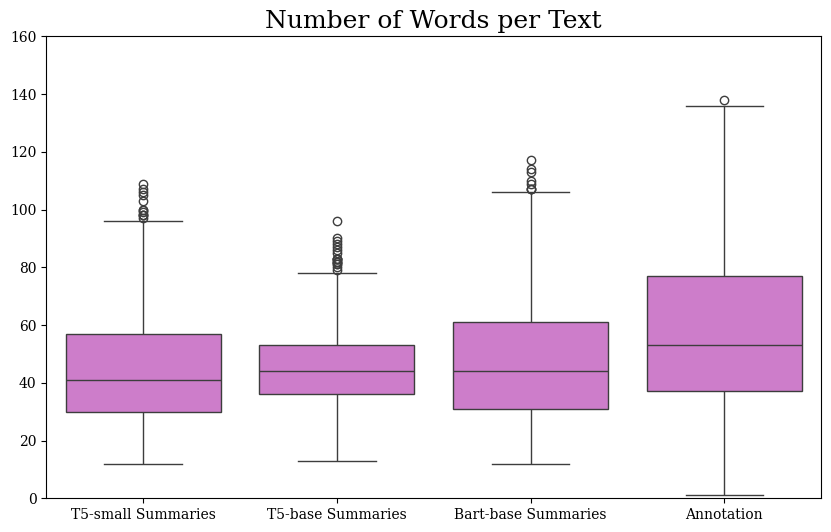

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib as mpl


mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

plt.figure(figsize=(10, 6))
sns.boxplot(data=word_count,color='orchid')
#plt.yscale('log')
plt.title('Number of Words per Text')
plt.ylim(top=160, bottom=0)

In [ ]:
!pip install nltk -q

In [ ]:
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



nltk.download('stopwords')
nltk.download('punkt')

def get_most_common_words(column, num_top_words=10):
    all_words = []

    for text in column:
        words = word_tokenize(str(text).lower())  # Convert to lowercase for case-insensitive counting
        stop_words = set(stopwords.words('english'))
        filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
        all_words.extend(filtered_words)

    # Calculate word frequencies
    freq_dist = FreqDist(all_words)

    return freq_dist


result_freq_dist_T5_small = get_most_common_words(sum_df['T5-small Summaries'])
result_freq_dist_T5_base = get_most_common_words(sum_df['T5-base Summaries'])
result_freq_dist_Bart = get_most_common_words(sum_df['Bart-base Summaries'])
result_freq_dist_Annotation = get_most_common_words(sum_df['Annotation'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import pandas as pd

def create_top_20_df(name):
    df_name = f"freq_words_{name}"
    df_name = pd.DataFrame(get_most_common_words(sum_df[name]).items(), columns=['Word', f'Absolute Frequency {name}'])
    df_name = df_name.sort_values(by=f'Absolute Frequency {name}', ascending=False).set_index('Word')
    df_name = df_name.head(20)
    return df_name

freq_words_T5_base=create_top_20_df("T5-base Summaries")
freq_words_T5_small=create_top_20_df("T5-small Summaries")
freq_words_Bart_base=create_top_20_df("Bart-base Summaries")
freq_words_Annotation=create_top_20_df("Annotation")

In [ ]:
#find the top 20 most frequent words that are present in all dfs
common_words = set(freq_words_T5_base.index.intersection(freq_words_T5_small.index ))
common_words= set(common_words.intersection(freq_words_Bart_base.index))
common_words= set(common_words.intersection(freq_words_Annotation.index))
common_words


{'episode',
 'game',
 'games',
 'number',
 'points',
 'score',
 'season',
 'team',
 'total',
 'two'}

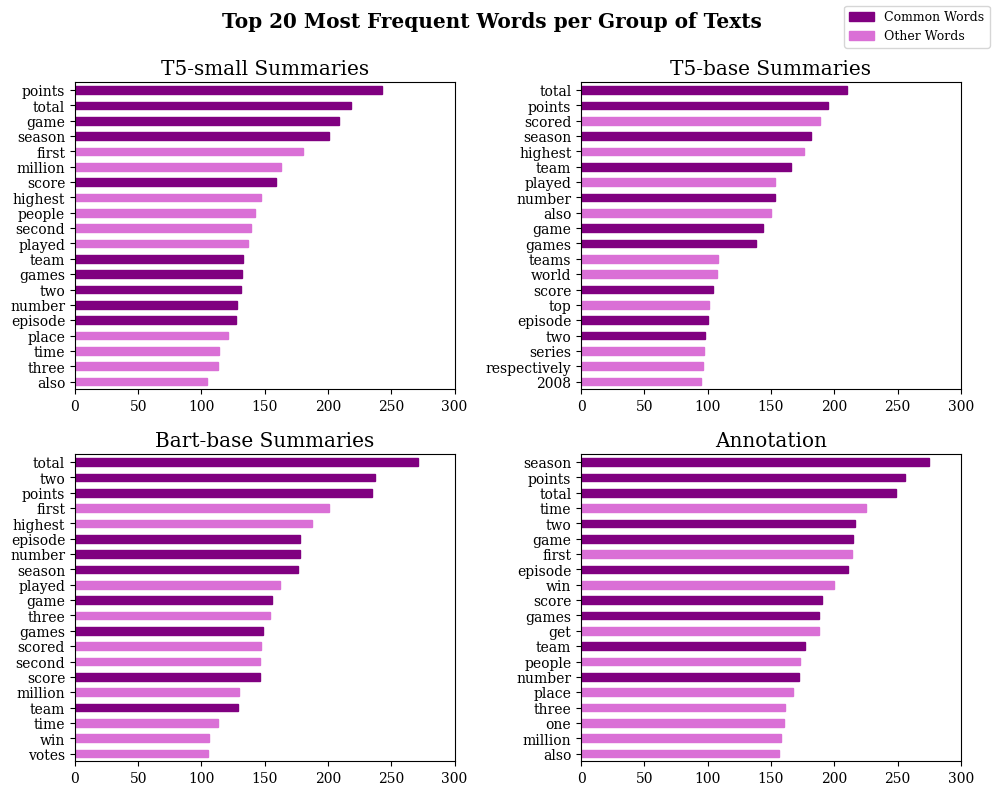

In [ ]:
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Subplot 1: T5-small
#color the bars of common words with a different color to stand out
colors = ['orchid' if word not in common_words else 'purple' for word in freq_words_T5_small.index]
sorted_colors=[colors[i] for i in reversed(range(len(colors)))]

bars1 = freq_words_T5_small.sort_values(by='Absolute Frequency T5-small Summaries').plot(kind='barh',legend=False,ax=axes[0, 0])

# Set the colors based on common_words
for bar, color in zip(bars1.patches, sorted_colors):
    bar.set_color(color)

axes[0, 0].set_title('T5-small Summaries')
axes[0, 0].set_xlim(right=300)
axes[0, 0].set_ylabel("")
axes[0,0].grid(False)

# Subplot 2: T5-base
#color the bars of common words with a different color to stand out
colors = ['orchid' if word not in common_words else 'purple' for word in freq_words_T5_base.index]
sorted_colors=[colors[i] for i in reversed(range(len(colors)))]

bars2=freq_words_T5_base.sort_values(by='Absolute Frequency T5-base Summaries').plot(kind='barh', legend=False, ax=axes[0, 1])

# Set the colors based on common_words
for bar, color in zip(bars2.patches, sorted_colors):
    bar.set_color(color)

axes[0, 1].set_title('T5-base Summaries')
axes[0, 1].set_ylabel("")
axes[0, 1].set_xlim(right=300)
axes[0, 1].grid(False)

# Subplot 3: Bart-base
#color the bars of common words with a different color to stand out
colors = ['orchid' if word not in common_words else 'purple' for word in freq_words_Bart_base.index]
sorted_colors=[colors[i] for i in reversed(range(len(colors)))]

bars3=freq_words_Bart_base.sort_values(by='Absolute Frequency Bart-base Summaries').plot(kind='barh', legend=False, ax=axes[1, 0])

# Set the colors based on common_words
for bar, color in zip(bars3.patches, sorted_colors):
    bar.set_color(color)

axes[1, 0].set_title('Bart-base Summaries')
axes[1, 0].set_xlim(right=300)
axes[1, 0].set_ylabel("")
axes[1,0].grid(False)

# Subplot 4: Annotation
#color the bars of common words with a different color to stand out
colors = ['orchid' if word not in common_words else 'purple' for word in freq_words_Annotation.index]
sorted_colors=[colors[i] for i in reversed(range(len(colors)))]

bars4=freq_words_Annotation.sort_values(by='Absolute Frequency Annotation').plot(kind='barh', legend=False, ax=axes[1, 1])

# Set the colors based on common_words
for bar, color in zip(bars4.patches, sorted_colors):
    bar.set_color(color)

axes[1, 1].set_title('Annotation')
axes[1, 1].set_xlim(right=300)
axes[1, 1].set_ylabel("")
axes[1, 1].grid(False)


legend_patch = mpatches.Patch(color='purple', label='Common Words')
legend_patch_other = mpatches.Patch(color='orchid', label='Other Words')
fig.legend(handles=[legend_patch, legend_patch_other], loc='upper right',fontsize=9)

fig.suptitle('Top 20 Most Frequent Words per Group of Texts', y=0.99, weight='bold')


# Adjust layout
plt.tight_layout()

plt.show()


#Giving ToTTo test set to QTSumm trained models

In [ ]:
!wget -O /content/input_test.pkl https://www.dropbox.com/scl/fi/tadz6falhrl8k8stx3ytk/input_test.pkl?rlkey=1gcz9c0dvdtq0zpcnst8ve8fr&dl=0 -q

/bin/bash: line 1: -q: command not found
--2024-02-16 11:32:22--  https://www.dropbox.com/scl/fi/tadz6falhrl8k8stx3ytk/input_test.pkl?rlkey=1gcz9c0dvdtq0zpcnst8ve8fr
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6ce8804719b28b707a034ad7bd.dl.dropboxusercontent.com/cd/0/inline/CNZ10YGL7g5jJewSYXzHGscrMRcWzEb2ma-EZlQMsGNU6zNxK3_zxYrBIXI3UQn2ZxrPXyDUEgodCSjYSaH08NkoH8u6pAkPQBe_LNH7ipp0dkcVHer9uI3RhHj69joTd2GeOnPz5h_t3GqCGjpJZfbK/file# [following]
--2024-02-16 11:32:23--  https://uc6ce8804719b28b707a034ad7bd.dl.dropboxusercontent.com/cd/0/inline/CNZ10YGL7g5jJewSYXzHGscrMRcWzEb2ma-EZlQMsGNU6zNxK3_zxYrBIXI3UQn2ZxrPXyDUEgodCSjYSaH08NkoH8u6pAkPQBe_LNH7ipp0dkcVHer9uI3RhHj69joTd2GeOnPz5h_t3GqCGjpJZfbK/file
Resolving uc6ce8804719b28b707a034ad7bd.dl.dropboxusercontent.com (uc6ce8804719b28b707a034ad7bd.dl.d

In [ ]:
import pickle
with open('/content/input_test.pkl', 'rb') as file:
    test_ToTTo= pickle.load(file)

In [ ]:
test_ToTTo

,Table to Text,Anotation,table_section_title
0,Table page title: List of Governors of South C...,Daniel Henry Chamberlain was the 76th Governor...,Governors under the Constitution of 1868
1,"Table page title: Alma Jodorowsky, Table secti...",Alma Jodorowsky had the role of Evelyn in 2016...,Filmography
2,"Table page title: A. J. Hawk, Table section ti...","In his rookie season, Hawk led with 119 total ...",Career statistics
3,"Table page title: List of rulers of Brittany, ...","At the very end of his life, Arthur III became...",House of Montfort
4,Table page title: List of Speakers of the Minn...,Ralph J. Parker was a Minnesota politician and...,State
...,...,...,...
7695,"Table page title: Hobart, Oklahoma, Table sect...","Hobart became the residence of 2,936 people.",Demographics
7696,"Table page title: Yohan Blake, Table section t...",Blake set the fastest time by a Jamaican junio...,Achievements
7697,"Table page title: Amber Kuo, Table section tit...",Amber Kuo was nominated in 2010 for Best Actre...,Awards and nominations
7698,Table page title: List of Religious Cultural M...,The Fatih Mosque is a Cultural Monument of Alb...,Durrës County


In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization", model="Depie/fine_tuned_t5_on_QTSumm_Focus_on_Unfiltered",tokenizer="Depie/fine_tuned_t5_on_QTSumm_Focus_on_Unfiltered",device='cuda')

In [ ]:
summaries = {}
for i, text in enumerate(test_ToTTo['Table to Text'].head(10)):
        text = "summarize: " + text
        summaries[i] = summarizer(text,min_length=5,max_length=30)
        print(f"Table {i}\nGenerated Summary: {summaries[i][0]['summary_text']}\nAnotation: {test_ToTTo['Anotation'].iloc[i]}\n")


Table 0
Generated Summary: Governors of South Carolina under Constitution of 1868 are Daniel Henry Chamberlain, Richard Howell Gleaves, and John Calhoun
Anotation: Daniel Henry Chamberlain was the 76th Governor of South Carolina from 1874.

Table 1
Generated Summary: Alma Jodorowsky's role in the 2016 Kids in Love Evelyn was a short film .
Anotation: Alma Jodorowsky had the role of Evelyn in 2016 film Kids in Love.

Table 2
Generated Summary: A. J. Hawk played a total of 119 games, with an AST of 37 games and an average interception return TD
Anotation: In his rookie season, Hawk led with 119 total tackles.

Table 3
Generated Summary: Peter II the Simple (Pêr II) 14501457 Arthur the Justicier (Arzhur III) 145714
Anotation: At the very end of his life, Arthur III became duke of Brittany, succeeding Peter II.

Table 4
Generated Summary: The Minnesota Legislative Reference Librarys list of Speakers of the House of Representatives includes Ralph J. Parker, who served from January
Anotation